# **KELOMPOK 9**
*****Tema : Question Answering System*****

***Judul : Implementasi BERT dan SNA dalam Sistem Tanya Jawab untuk Survei Demam Berdarah Dengue***

Anggota Kelompok
1. Rindra Syaifullah
2. Rofiatun Nadifah
3. Nasywaa Almaasah Zatri

# **Import**

In [ ]:
import pandas as pd
import numpy as np
import re
import unicodedata


#=== Natural Language Processing (NLP) ===
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

# === Machine Learning & Modeling ===
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# === Feature Extraction & Vectorization ===
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# === Evaluation Metrics ===
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, silhouette_score

# === Visualization ===
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# === Datasets (for testing/demonstration) ===
from sklearn.datasets import make_blobs


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
!pip install Sastrawi
stop = nltk.corpus.stopwords.words('indonesian')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


# **Read Data**

In [ ]:
# import pandas as pd

# url = "https://raw.githubusercontent.com/difaahh/Text-Mining/main/survei_dbd_mining.csv"
# data1 = pd.read_csv(url, encoding='latin1')  # atau coba 'ISO-8859-1' jika perlu

# # Lihat isi data
# data1


In [ ]:
import pandas as pd

# === 1. Baca file ===
data1 = pd.read_csv("https://raw.githubusercontent.com/difaahh/Text-Mining/main/survei_dbd_mining.csv",encoding = 'latin1')  # ganti dengan path file kamu

# === 2. Hapus kolom Timestamp ===
data1 = data1.drop(columns=["Timestamp"])

# === 3. Transpose agar pertanyaan jadi index dan responden jadi kolom ===
data2 = data1.transpose()

# === 4. Ganti nama kolom menjadi 'Responden 1', 'Responden 2', dst. ===
data2.columns = [f"r{i+1}" for i in range(data2.shape[1])]

# === 5. Tambahkan kolom pertanyaan sebagai index (judul baris) ===
data2.index.name = "pertanyaan"

# === 6. Reset index jika ingin sebagai kolom biasa (opsional)
data3= data2.reset_index()

# === 7. Tampilkan
data3


pertanyaan  \
0  Apa yang dimaksud dengan Demam Berdarah Dengue...   
1     Apa gejala utama Demam Berdarah Dengue (DBD)!    
2  Apa penyebab utama penyakit Demam Berdarah Den...   
3    Bagaimana cara penularan penyakit DBD terjadi?    
4  Apa solusi untuk meningkatkan kepedulian masya...   

                                                  r1  \
0  Demam Berdarah Dengue (DBD) adalah penyakit in...   
1  Gejala utama DBD meliputi demam tinggi mendada...   
2  Penyebab utama penyakit Demam Berdarah Dengue ...   
3  Penularan DBD terjadi saat nyamuk Aedes aegypt...   
4  Solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r2  \
0  Demam Berdarah Dengue (DBD) adalah penyakit ya...   
1  Gejala utama Demam Berdarah Dengue (DBD) melip...   
2  Penyebab utama penyakit Demam Berdarah Dengue ...   
3  Penyakit DBD ditularkan melalui gigitan nyamuk...   
4  Solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r3  \
0  Demam Berdarah Dengue (DBD) adalah penyakit me...   
1  Gejala utama Demam Berdarah Dengue (DBD) melip...   
2  Penyebab utama penyakit Demam Berdarah Dengue ...   
3  Penularan penyakit DBD terjadi melalui gigitan...   
4  Solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r4  \
0  Demam Berdarah Dengue (DBD) adalah penyakit in...   
1  DBD adalah penyakit infeksi virus akut yang di...   
2  Penyebab utama penyakit Demam Berdarah Dengue ...   
3  Penularan DBD terjadi saat nyamuk Aedes aegypt...   
4  Solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r5  \
0  DBD adalah penyakit infeksi virus Dengue yang ...   
1  Gejala utama DBD adalah demam tinggi mendadak ...   
2  Penyebab utama DBD adalah virus Dengue (seroti...   
3  Penularan DBD terjadi ketika nyamuk Aedes aegy...   
4  implementasi gerakan 3M Plus secara kolektif, ...   

                                                  r6  \
0  Penyakit berbahaya yang disebabkan oleh nyamuk...   
1                                       demam denggi   
2                               nyamuk aedes aegypti   
3  dari orang yang terkena lalu nyamuk tersebut m...   
4  membersihkan lingkungan-lingkungan terutama li...   

                                                  r7  \
0  Demam Berdarah Dengue (DBD) adalah penyakit in...   
1  Gejala utama Demam Berdarah Dengue (DBD) adala...   
2  Penyebab utama Demam Berdarah Dengue adalah in...   
3  Penularan DBD terjadi ketika nyamuk Aedes aegy...   
4  Solusi meningkatkan kepedulian masyarakat terh...   

                                                  r8  \
0  penyakit demam yang disebabkan oleh nyamuk aed...   
1                                        badan panas   
2                               nyamuk aedes aegepty   
3               manusia digigit nyamuk aedes aegepty   
4  kampanye tetang bahaya penyakit ini secara bes...   

                                                  r9  ...  \
0      demam parah yang disebabkan oleh nyamuk aegis  ...   
1                      suhu tubuh yang sangat tinggi  ...   
2  nyamuk aegis, banyak genangan, dan lingkungan ...  ...   
3                               melalui nyamuk aegis  ...   
4  memberikan informasi terkait pentingnya penceg...  ...   

                                                 r24  \
0  penyakit yang disebabkan oleh nyamuk aides aig...   
1                             deman, flu, pilek, dll   
2                               nyamuk aides aigepti   
3                                              gatau   
4  memberitahukan kepada masyarakat bahwa penyaki...   

                                                 r25  \
0  Demam Berdarah Dengue (DBD) adalah penyakit ya...   
1  Gejala utama Demam Berdarah Dengue (DBD) melip...   
2  Penyebab utama penyakit Demam Berdarah Dengue ...   
3  Cara penularan penyakit DBD terjadi melalui gi...   
4  Solusi untuk meningkat

In [ ]:
import pandas as pd

# List pertanyaan
pertanyaan = [
    "Apa yang dimaksud dengan Demam Berdarah Dengue (DBD)? ",
    "Apa gejala utama Demam Berdarah Dengue (DBD)! ",
    "Apa penyebab utama penyakit Demam Berdarah Dengue?",
    "Bagaimana cara penularan penyakit DBD terjadi? ",
    "Apa solusi untuk meningkatkan kepedulian masyarakat terhadap pencegahan DBD? "
]

# List kunci jawaban
kunci_jawaban = [
    "DBD adalah penyakit infeksi akut yang disebabkan oleh virus dengue dan ditularkan melalui gigitan nyamuk Aedes aegypti. Penyakit ini ditandai dengan demam mendadak, nyeri otot, sakit kepala, dan dapat menyebabkan perdarahan serta syok yang berpotensi fatal jika tidak ditangani dengan tepat.",
    "Gejala utama DBD meliputi demam tinggi mendadak (38-40°C), sakit kepala hebat, nyeri otot dan sendi, mual muntah, ruam kemerahan pada kulit, nyeri perut, dan tanda perdarahan seperti mimisan, gusi berdarah, atau bintik merah di kulit.",
    "DBD disebabkan oleh virus dengue yang memiliki empat serotipe yaitu DEN-1, DEN-2, DEN-3, dan DEN-4. Virus ini ditularkan melalui gigitan nyamuk Aedes aegypti yang terinfeksi.",
    "DBD ditularkan melalui gigitan nyamuk Aedes aegypti yang aktif pada siang dan sore hari. Nyamuk ini berkembang biak di air jernih tergenang seperti bak mandi, kaleng bekas, dan ban mobil. DBD tidak menular langsung antarmanusia.",
    "Solusi meningkatkan kepedulian meliputi sosialisasi intensif tentang dampak fatal DBD, melibatkan tokoh masyarakat dalam kampanye 3M Plus, edukasi melalui media massa, dan demonstrasi langsung cara pemberantasan jentik nyamuk."
]

# Membuat DataFrame
data_k = pd.DataFrame({
    "pertanyaan": pertanyaan,
    "kunci_jawaban": kunci_jawaban
})

# Menampilkan DataFrame
data_k

pertanyaan  \
0  Apa yang dimaksud dengan Demam Berdarah Dengue...   
1     Apa gejala utama Demam Berdarah Dengue (DBD)!    
2  Apa penyebab utama penyakit Demam Berdarah Den...   
3    Bagaimana cara penularan penyakit DBD terjadi?    
4  Apa solusi untuk meningkatkan kepedulian masya...   

                                       kunci_jawaban  
0  DBD adalah penyakit infeksi akut yang disebabk...  
1  Gejala utama DBD meliputi demam tinggi mendada...  
2  DBD disebabkan oleh virus dengue yang memiliki...  
3  DBD ditularkan melalui gigitan nyamuk Aedes ae...  
4  Solusi meningkatkan kepedulian meliputi sosial...

In [ ]:
# Gabungkan berdasarkan kolom 'Pertanyaan'
data = pd.merge(data3, data_k, on="pertanyaan", how="right")

data


pertanyaan  \
0  Apa yang dimaksud dengan Demam Berdarah Dengue...   
1     Apa gejala utama Demam Berdarah Dengue (DBD)!    
2  Apa penyebab utama penyakit Demam Berdarah Den...   
3    Bagaimana cara penularan penyakit DBD terjadi?    
4  Apa solusi untuk meningkatkan kepedulian masya...   

                                                  r1  \
0  Demam Berdarah Dengue (DBD) adalah penyakit in...   
1  Gejala utama DBD meliputi demam tinggi mendada...   
2  Penyebab utama penyakit Demam Berdarah Dengue ...   
3  Penularan DBD terjadi saat nyamuk Aedes aegypt...   
4  Solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r2  \
0  Demam Berdarah Dengue (DBD) adalah penyakit ya...   
1  Gejala utama Demam Berdarah Dengue (DBD) melip...   
2  Penyebab utama penyakit Demam Berdarah Dengue ...   
3  Penyakit DBD ditularkan melalui gigitan nyamuk...   
4  Solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r3  \
0  Demam Berdarah Dengue (DBD) adalah penyakit me...   
1  Gejala utama Demam Berdarah Dengue (DBD) melip...   
2  Penyebab utama penyakit Demam Berdarah Dengue ...   
3  Penularan penyakit DBD terjadi melalui gigitan...   
4  Solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r4  \
0  Demam Berdarah Dengue (DBD) adalah penyakit in...   
1  DBD adalah penyakit infeksi virus akut yang di...   
2  Penyebab utama penyakit Demam Berdarah Dengue ...   
3  Penularan DBD terjadi saat nyamuk Aedes aegypt...   
4  Solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r5  \
0  DBD adalah penyakit infeksi virus Dengue yang ...   
1  Gejala utama DBD adalah demam tinggi mendadak ...   
2  Penyebab utama DBD adalah virus Dengue (seroti...   
3  Penularan DBD terjadi ketika nyamuk Aedes aegy...   
4  implementasi gerakan 3M Plus secara kolektif, ...   

                                                  r6  \
0  Penyakit berbahaya yang disebabkan oleh nyamuk...   
1                                       demam denggi   
2                               nyamuk aedes aegypti   
3  dari orang yang terkena lalu nyamuk tersebut m...   
4  membersihkan lingkungan-lingkungan terutama li...   

                                                  r7  \
0  Demam Berdarah Dengue (DBD) adalah penyakit in...   
1  Gejala utama Demam Berdarah Dengue (DBD) adala...   
2  Penyebab utama Demam Berdarah Dengue adalah in...   
3  Penularan DBD terjadi ketika nyamuk Aedes aegy...   
4  Solusi meningkatkan kepedulian masyarakat terh...   

                                                  r8  \
0  penyakit demam yang disebabkan oleh nyamuk aed...   
1                                        badan panas   
2                               nyamuk aedes aegepty   
3               manusia digigit nyamuk aedes aegepty   
4  kampanye tetang bahaya penyakit ini secara bes...   

                                                  r9  ...  \
0      demam parah yang disebabkan oleh nyamuk aegis  ...   
1                      suhu tubuh yang sangat tinggi  ...   
2  nyamuk aegis, banyak genangan, dan lingkungan ...  ...   
3                               melalui nyamuk aegis  ...   
4  memberikan informasi terkait pentingnya penceg...  ...   

                                                 r25  \
0  Demam Berdarah Dengue (DBD) adalah penyakit ya...   
1  Gejala utama Demam Berdarah Dengue (DBD) melip...   
2  Penyebab utama penyakit Demam Berdarah Dengue ...   
3  Cara penularan penyakit DBD terjadi melalui gi...   
4  Solusi untuk meningkatkan kepedulian masyaraka...   

                                                 r26  \
0  penyakit yang disebabkan oleh virus dengue yan...   
1        ada bintik merah pada tubuh dan mudah lelah   
2  virus dengue yang ditularkan melalui gigitan n...   
3  melalui gigitan nyamuk spesies Aedes yang teri...   
4                 penyulu

In [ ]:
# data = pd.read_csv("https://raw.githubusercontent.com/difaahh/Text-Mining/refs/heads/main/dokter_qna.csv")
# data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pertanyaan     5 non-null      object
 1   r1             5 non-null      object
 2   r2             5 non-null      object
 3   r3             5 non-null      object
 4   r4             5 non-null      object
 5   r5             5 non-null      object
 6   r6             5 non-null      object
 7   r7             5 non-null      object
 8   r8             5 non-null      object
 9   r9             5 non-null      object
 10  r10            5 non-null      object
 11  r11            5 non-null      object
 12  r12            5 non-null      object
 13  r13            5 non-null      object
 14  r14            5 non-null      object
 15  r15            5 non-null      object
 16  r16            5 non-null      object
 17  r17            5 non-null      object
 18  r18            5 non-null      obj

In [ ]:
data.isnull().sum()

pertanyaan       0
r1               0
r2               0
r3               0
r4               0
r5               0
r6               0
r7               0
r8               0
r9               0
r10              0
r11              0
r12              0
r13              0
r14              0
r15              0
r16              0
r17              0
r18              0
r19              0
r20              0
r21              0
r22              0
r23              0
r24              0
r25              0
r26              0
r27              0
r28              0
r29              0
r30              0
r31              0
r32              0
r33              0
kunci_jawaban    0
dtype: int64

# **Preprocessing**

## Lowercase

In [ ]:
#lowercase

data = data.apply(lambda x: x.astype(str).str.lower())

## Case Folding

In [ ]:
import re

def clean_text(text):
    text = str(text).lower()
    # hapus konten dalam tanda kurung beserta tanda kurungnya
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r'\[[^\]]*\]', '', text)
    text = re.sub(r'\{[^}]*\}', '', text)
    # ubah frasa lengkap jadi "dbd"
    text = text.replace("demam berdarah dengue", "dbd")
    # hapus karakter bukan huruf dan spasi
    text = re.sub(r'[^a-z\s]', '', text)
    # hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    # hilangkan duplikasi "dbd dbd"
    text = re.sub(r'\bdbd\b(?:\s+\bdbd\b)+', 'dbd', text)
    return text

# Terapkan ke seluruh DataFrame
data = data.applymap(clean_text)
data


<ipython-input-11-4027767166>:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(clean_text)


pertanyaan  \
0                       apa yang dimaksud dengan dbd   
1                               apa gejala utama dbd   
2                    apa penyebab utama penyakit dbd   
3      bagaimana cara penularan penyakit dbd terjadi   
4  apa solusi untuk meningkatkan kepedulian masya...   

                                                  r1  \
0  dbd adalah penyakit infeksi virus akut yang di...   
1  gejala utama dbd meliputi demam tinggi mendada...   
2  penyebab utama penyakit dbd adalah infeksi vir...   
3  penularan dbd terjadi saat nyamuk aedes aegypt...   
4  solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r2  \
0  dbd adalah penyakit yang disebabkan oleh virus...   
1  gejala utama dbd meliputi demam tinggi mendada...   
2  penyebab utama penyakit dbd adalah infeksi vir...   
3  penyakit dbd ditularkan melalui gigitan nyamuk...   
4  solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r3  \
0  dbd adalah penyakit menular yang disebabkan ol...   
1  gejala utama dbd meliputi demam tinggi mendada...   
2  penyebab utama penyakit dbd adalah virus dengu...   
3  penularan penyakit dbd terjadi melalui gigitan...   
4  solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r4  \
0  dbd adalah penyakit infeksi virus akut yang di...   
1  dbd adalah penyakit infeksi virus akut yang di...   
2  penyebab utama penyakit dbd adalah infeksi vir...   
3  penularan dbd terjadi saat nyamuk aedes aegypt...   
4  solusi untuk meningkatkan kepedulian masyaraka...   

                                                  r5  \
0  dbd adalah penyakit infeksi virus dengue yang ...   
1  gejala utama dbd adalah demam tinggi mendadak ...   
2  penyebab utama dbd adalah virus dengue yang di...   
3  penularan dbd terjadi ketika nyamuk aedes aegy...   
4  implementasi gerakan m plus secara kolektif pe...   

                                                  r6  \
0  penyakit berbahaya yang disebabkan oleh nyamuk...   
1                                       demam denggi   
2                               nyamuk aedes aegypti   
3  dari orang yang terkena lalu nyamuk tersebut m...   
4  membersihkan lingkunganlingkungan terutama lin...   

                                                  r7  \
0  dbd adalah penyakit infeksi yang disebabkan ol...   
1  gejala utama dbd adalah demam tinggi sakit kep...   
2  penyebab utama dbd adalah infeksi virus dengue...   
3  penularan dbd terjadi ketika nyamuk aedes aegy...   
4  solusi meningkatkan kepedulian masyarakat terh...   

                                                  r8  \
0  penyakit demam yang disebabkan oleh nyamuk aed...   
1                                        badan panas   
2                               nyamuk aedes aegepty   
3               manusia digigit nyamuk aedes aegepty   
4  kampanye tetang bahaya penyakit ini secara bes...   

                                                  r9  ...  \
0      demam parah yang disebabkan oleh nyamuk aegis  ...   
1                      suhu tubuh yang sangat tinggi  ...   
2  nyamuk aegis banyak genangan dan lingkungan kotor  ...   
3                               melalui nyamuk aegis  ...   
4  memberikan informasi terkait pentingnya penceg...  ...   

                                                 r25  \
0  dbd adalah penyakit yang disebabkan oleh infek...   
1  gejala utama dbd meliputi demam tinggi mendada...   
2  penyebab utama penyakit dbd adalah infeksi vir...   
3  cara penularan penyakit dbd terjadi melalui gi...   
4  solusi untuk meningkatkan kepedulian masyaraka...   

                                                 r26  \
0  penyakit yang disebabkan oleh virus dengue yan...   
1        ada bintik merah pada tubuh dan mudah lelah   
2  virus dengue yang ditularkan melalui gigitan n...   
3  melalui gigitan nyamuk spesies aedes yang teri...   
4                 penyulu

## Normalisasi

In [ ]:
slang_dict = {
    "dbd": "demam berdarah dengue",
    "dengue": "demam berdarah dengue",
    "yg": "yang",
    "dgn": "dengan",
    "aegis": "aedes aegypti",
    "aegis": "aedes aegypti",
    "aeddbd": "aedes aegypti",
    "aegepty": "aedes aegypti",
    "aedes" :"aedes aegypti",
    "aides":"aedes aegypti",
    "aigepti":"aedes aegypti",

    "m":"tiga m",
    "udh": "sudah",
    "gatau":"tidak tau",
    "vogging":"fogging"
    # Tambahkan lainnya sesuai data
}

def normalize_slang(text):
    words = text.split()
    normalized = [slang_dict[word] if word in slang_dict else word for word in words]
    return ' '.join(normalized)

# Apply normalisasi slang sebelum tokenizing
data = data.applymap(normalize_slang)


<ipython-input-12-3170297897>:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(normalize_slang)


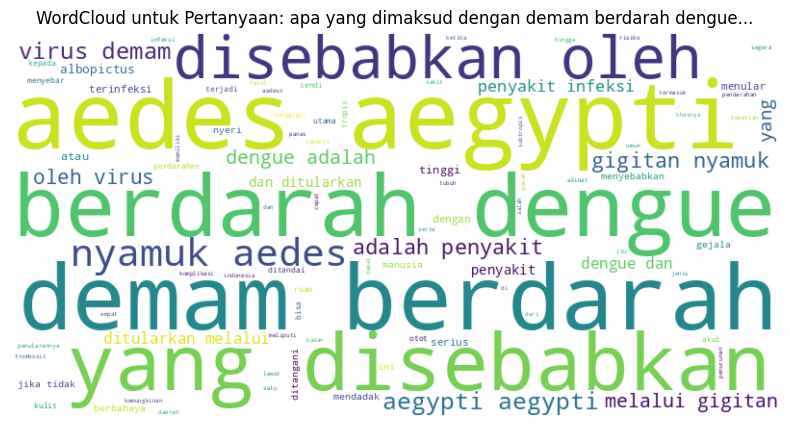

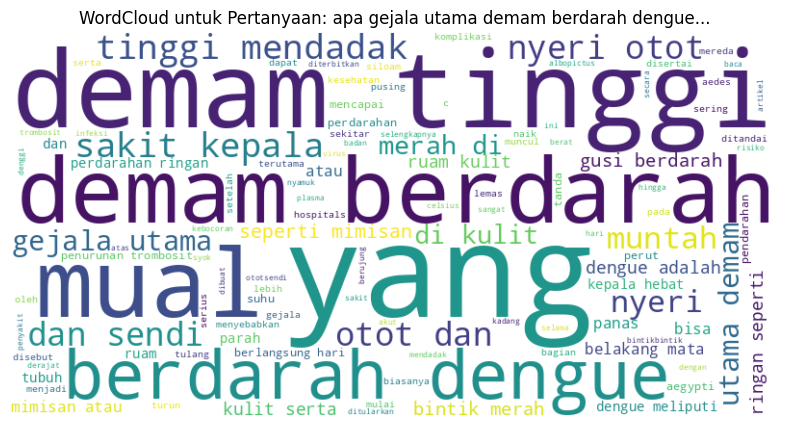

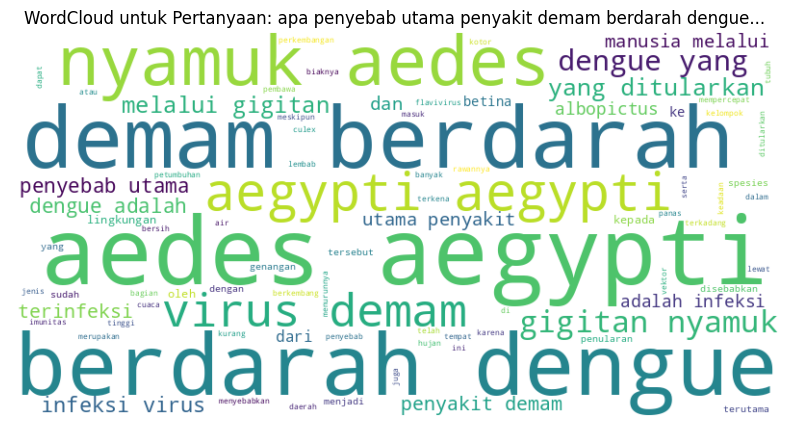

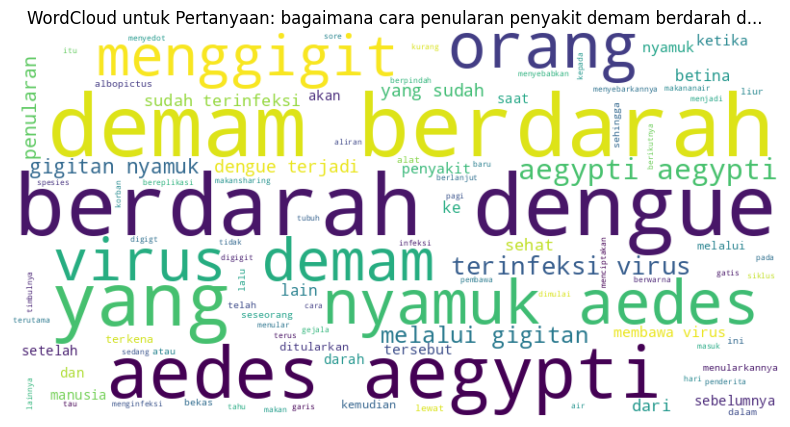

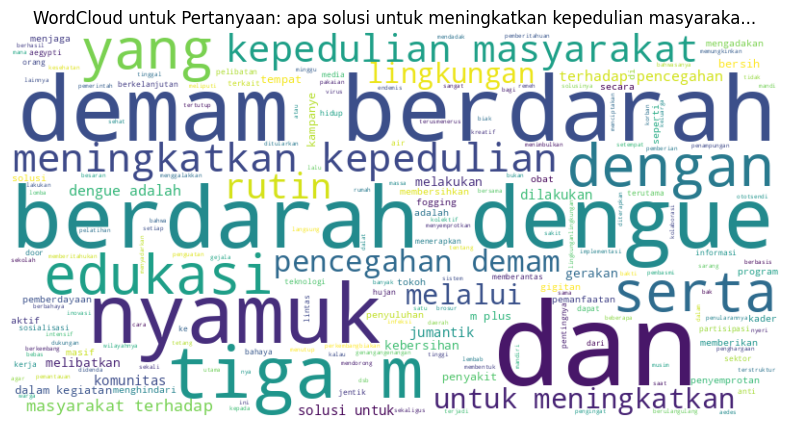

In [ ]:
# Kolom pertanyaan dan responden
pertanyaan = data['pertanyaan']
responden_cols = ['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'r14','r15',
                  'r15','r16','r17','r18','r19','r21','r22','r23','r24','r25','r26','r27','r28','r29','r30','r31']

# Ulangi untuk setiap baris (pertanyaan)
for idx, row in data.iterrows():
    # Gabungkan semua jawaban untuk satu pertanyaan
    combined_text = ' '.join([str(row[col]) for col in responden_cols])

    # Buat wordcloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Tampilkan
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud untuk Pertanyaan: {row["pertanyaan"][:50]}...')
    plt.show()


## Stopword Removal

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Buat objek stopword remover
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

def remove_stopwords(text):
    return stopword.remove(text)

# Misal data sudah dibersihkan sebelumnya, tinggal apply:
data = data.applymap(remove_stopwords)
data

<ipython-input-14-4212993012>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(remove_stopwords)


pertanyaan  \
0                 apa dimaksud demam berdarah dengue   
1             apa gejala utama demam berdarah dengue   
2  apa penyebab utama penyakit demam berdarah dengue   
3  bagaimana cara penularan penyakit demam berdar...   
4  apa solusi meningkatkan kepedulian masyarakat ...   

                                                  r1  \
0  demam berdarah dengue penyakit infeksi virus a...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r2  \
0  demam berdarah dengue penyakit disebabkan viru...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penyakit demam berdarah dengue ditularkan mela...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r3  \
0  demam berdarah dengue penyakit menular disebab...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penularan penyakit demam berdarah dengue terja...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r4  \
0  demam berdarah dengue penyakit infeksi virus a...   
1  demam berdarah dengue penyakit infeksi virus a...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r5  \
0  demam berdarah dengue penyakit infeksi virus d...   
1  gejala utama demam berdarah dengue demam tingg...   
2  penyebab utama demam berdarah dengue virus dem...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  implementasi gerakan tiga m plus kolektif peli...   

                                                  r6  \
0  penyakit berbahaya disebabkan nyamuk aedes aeg...   
1                                       demam denggi   
2                       nyamuk aedes aegypti aegypti   
3  orang terkena lalu nyamuk tersebut menularkann...   
4  membersihkan lingkunganlingkungan terutama lin...   

                                                  r7  \
0  demam berdarah dengue penyakit infeksi disebab...   
1  gejala utama demam berdarah dengue demam tingg...   
2  penyebab utama demam berdarah dengue infeksi v...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r8  \
0  penyakit demam disebabkan nyamuk aedes aegypti...   
1                                        badan panas   
2                 nyamuk aedes aegypti aedes aegypti   
3  manusia digigit nyamuk aedes aegypti aedes aeg...   
4     kampanye tetang bahaya penyakit secara besaran   

                                                  r9  ...  \
0        demam parah disebabkan nyamuk aedes aegypti  ...   
1                           suhu tubuh sangat tinggi  ...   
2  nyamuk aedes aegypti banyak genangan lingkunga...  ...   
3                       melalui nyamuk aedes aegypti  ...   
4  memberikan informasi terkait pentingnya penceg...  ...   

                                                 r25  \
0  demam berdarah dengue penyakit disebabkan infe...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  cara penularan penyakit demam berdarah dengue ...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                 r26  \
0  penyakit disebabkan virus demam berdarah dengu...   
1                     bintik merah tubuh mudah lelah   
2  virus demam berdarah dengue ditularkan melalui...   
3  melalui gigitan nyamuk spesies aedes aegypti t...   
4                       p

## Worldcloud Setelah Stopword

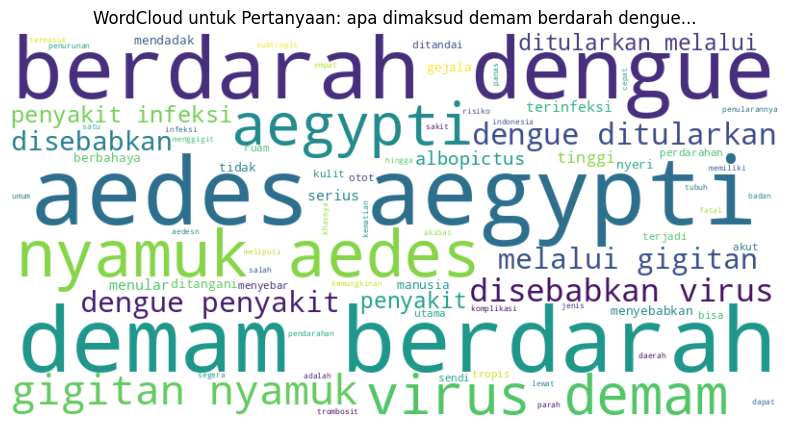

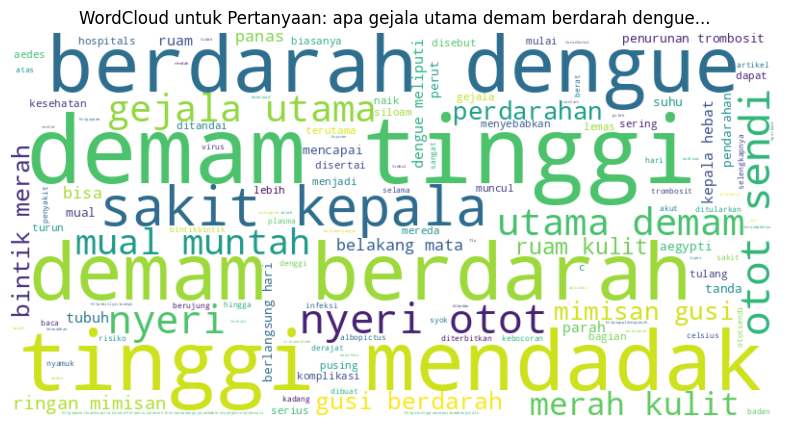

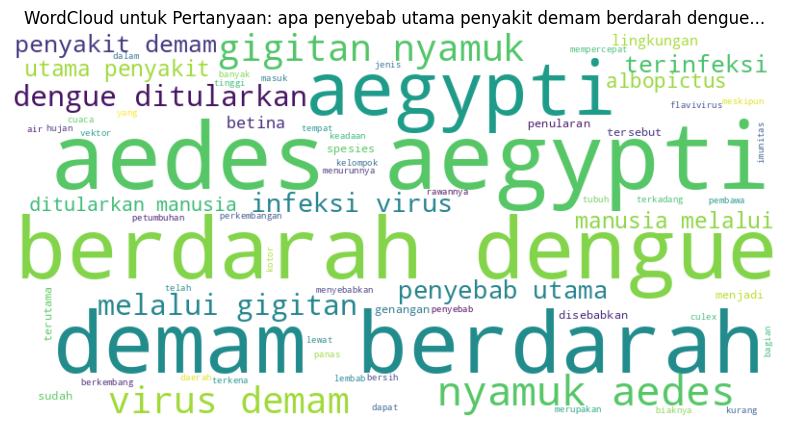

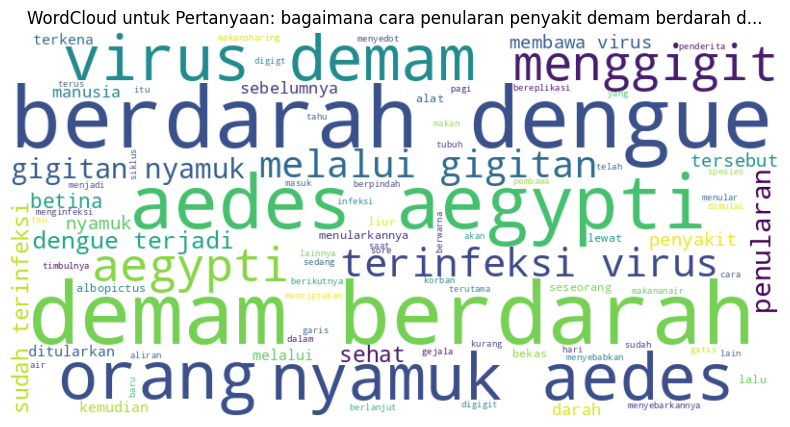

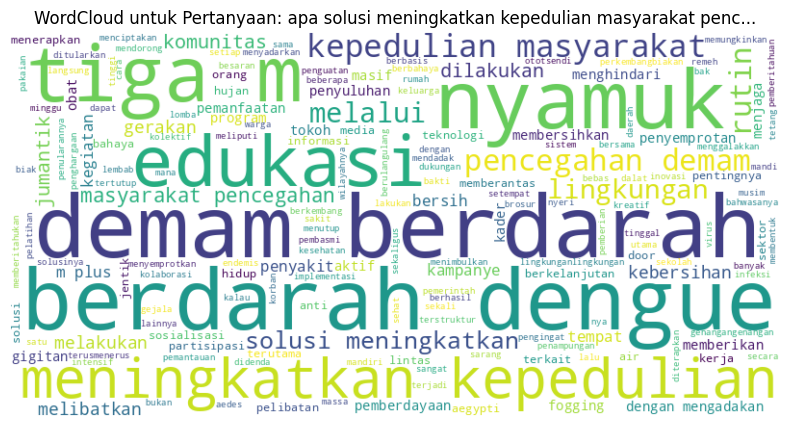

In [ ]:
# Kolom pertanyaan dan responden
pertanyaan = data['pertanyaan']
responden_cols = ['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'r14','r15',
                  'r15','r16','r17','r18','r19','r21','r22','r23','r24','r25','r26','r27','r28','r29','r30','r31']

# Ulangi untuk setiap baris (pertanyaan)
for idx, row in data.iterrows():
    # Gabungkan semua jawaban untuk satu pertanyaan
    combined_text = ' '.join([str(row[col]) for col in responden_cols])

    # Buat wordcloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Tampilkan
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud untuk Pertanyaan: {row["pertanyaan"][:50]}...')
    plt.show()


In [ ]:
data

pertanyaan  \
0                 apa dimaksud demam berdarah dengue   
1             apa gejala utama demam berdarah dengue   
2  apa penyebab utama penyakit demam berdarah dengue   
3  bagaimana cara penularan penyakit demam berdar...   
4  apa solusi meningkatkan kepedulian masyarakat ...   

                                                  r1  \
0  demam berdarah dengue penyakit infeksi virus a...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r2  \
0  demam berdarah dengue penyakit disebabkan viru...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penyakit demam berdarah dengue ditularkan mela...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r3  \
0  demam berdarah dengue penyakit menular disebab...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penularan penyakit demam berdarah dengue terja...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r4  \
0  demam berdarah dengue penyakit infeksi virus a...   
1  demam berdarah dengue penyakit infeksi virus a...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r5  \
0  demam berdarah dengue penyakit infeksi virus d...   
1  gejala utama demam berdarah dengue demam tingg...   
2  penyebab utama demam berdarah dengue virus dem...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  implementasi gerakan tiga m plus kolektif peli...   

                                                  r6  \
0  penyakit berbahaya disebabkan nyamuk aedes aeg...   
1                                       demam denggi   
2                       nyamuk aedes aegypti aegypti   
3  orang terkena lalu nyamuk tersebut menularkann...   
4  membersihkan lingkunganlingkungan terutama lin...   

                                                  r7  \
0  demam berdarah dengue penyakit infeksi disebab...   
1  gejala utama demam berdarah dengue demam tingg...   
2  penyebab utama demam berdarah dengue infeksi v...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r8  \
0  penyakit demam disebabkan nyamuk aedes aegypti...   
1                                        badan panas   
2                 nyamuk aedes aegypti aedes aegypti   
3  manusia digigit nyamuk aedes aegypti aedes aeg...   
4     kampanye tetang bahaya penyakit secara besaran   

                                                  r9  ...  \
0        demam parah disebabkan nyamuk aedes aegypti  ...   
1                           suhu tubuh sangat tinggi  ...   
2  nyamuk aedes aegypti banyak genangan lingkunga...  ...   
3                       melalui nyamuk aedes aegypti  ...   
4  memberikan informasi terkait pentingnya penceg...  ...   

                                                 r25  \
0  demam berdarah dengue penyakit disebabkan infe...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  cara penularan penyakit demam berdarah dengue ...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                 r26  \
0  penyakit disebabkan virus demam berdarah dengu...   
1                     bintik merah tubuh mudah lelah   
2  virus demam berdarah dengue ditularkan melalui...   
3  melalui gigitan nyamuk spesies aedes aegypti t...   
4                       p

## Tokenize dan Stemming

In [ ]:
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

# Inisiasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Salin dataframe asli
data_clean = data.copy()

# Tokenizing & Stemming setiap kolom kecuali 'pertanyaan'
for col in data_clean.columns:
    if col != 'pertanyaan':
        # Tokenizing per baris
        data_clean[col + '_token'] = data_clean[col].astype(str).apply(word_tokenize)
        # Stemming per token
        data_clean[col + '_stem'] = data_clean[col + '_token'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

data_clean.head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


pertanyaan  \
0                 apa dimaksud demam berdarah dengue   
1             apa gejala utama demam berdarah dengue   
2  apa penyebab utama penyakit demam berdarah dengue   
3  bagaimana cara penularan penyakit demam berdar...   
4  apa solusi meningkatkan kepedulian masyarakat ...   

                                                  r1  \
0  demam berdarah dengue penyakit infeksi virus a...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r2  \
0  demam berdarah dengue penyakit disebabkan viru...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penyakit demam berdarah dengue ditularkan mela...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r3  \
0  demam berdarah dengue penyakit menular disebab...   
1  gejala utama demam berdarah dengue meliputi de...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penularan penyakit demam berdarah dengue terja...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r4  \
0  demam berdarah dengue penyakit infeksi virus a...   
1  demam berdarah dengue penyakit infeksi virus a...   
2  penyebab utama penyakit demam berdarah dengue ...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r5  \
0  demam berdarah dengue penyakit infeksi virus d...   
1  gejala utama demam berdarah dengue demam tingg...   
2  penyebab utama demam berdarah dengue virus dem...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  implementasi gerakan tiga m plus kolektif peli...   

                                                  r6  \
0  penyakit berbahaya disebabkan nyamuk aedes aeg...   
1                                       demam denggi   
2                       nyamuk aedes aegypti aegypti   
3  orang terkena lalu nyamuk tersebut menularkann...   
4  membersihkan lingkunganlingkungan terutama lin...   

                                                  r7  \
0  demam berdarah dengue penyakit infeksi disebab...   
1  gejala utama demam berdarah dengue demam tingg...   
2  penyebab utama demam berdarah dengue infeksi v...   
3  penularan demam berdarah dengue terjadi nyamuk...   
4  solusi meningkatkan kepedulian masyarakat penc...   

                                                  r8  \
0  penyakit demam disebabkan nyamuk aedes aegypti...   
1                                        badan panas   
2                 nyamuk aedes aegypti aedes aegypti   
3  manusia digigit nyamuk aedes aegypti aedes aeg...   
4     kampanye tetang bahaya penyakit secara besaran   

                                                  r9  ...  \
0        demam parah disebabkan nyamuk aedes aegypti  ...   
1                           suhu tubuh sangat tinggi  ...   
2  nyamuk aedes aegypti banyak genangan lingkunga...  ...   
3                       melalui nyamuk aedes aegypti  ...   
4  memberikan informasi terkait pentingnya penceg...  ...   

                               r30_token                      r30_stem  \
0   [penyakit, virus, disebabkan, virus]  [sakit, virus, sebab, virus]   
1         [timbul, ruam, merah, dibadan]    [timbul, ruam, merah, bad]   
2                      [gigitan, nyamuk]               [gigit, nyamuk]   
3                 [digigt, nyamuk, lain]        [digigt, nyamuk, lain]   
4  [didenda, kalau, menjaga, kebersihan]  [denda, kalau, jaga, bersih]   

                                           r31_token  \
0                      [adalah, penyakit, berbahaya]   
1                             [sakit, panas, tinggi]   
2                            

In [ ]:
data_clean1= data_clean['r1_token']
data_clean1

0    [demam, berdarah, dengue, penyakit, infeksi, v...
1    [gejala, utama, demam, berdarah, dengue, melip...
2    [penyebab, utama, penyakit, demam, berdarah, d...
3    [penularan, demam, berdarah, dengue, terjadi, ...
4    [solusi, meningkatkan, kepedulian, masyarakat,...
Name: r1_token, dtype: object

In [ ]:
# # Gabungkan list token hasil stemming jadi satu kalimat string
# for col in data_clean.columns:
#     if col.endswith('_stem'):
#         data_clean[col + '_clean'] = data_clean[col].apply(lambda tokens: ' '.join(tokens))
# data_clean

In [ ]:
# import pandas as pd
# import re
# import string

# # fungsi untuk membersihkan teks
# def filtering_text(text):
#     text = text.lower()
#     text = re.sub(r'https?:\/\/\S+', '', text)  # hapus URL
#     text = ' '.join(re.sub(r'([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)', ' ', text).split())  # hapus mention/hashtag/link
#     text = re.sub(r"(b\'{1,2})", "", text)  # hapus karakter byte
#     text = re.sub('[^a-zA-Z]', ' ', text)  # hanya huruf
#     text = re.sub(r'\d+', '', text)  # hapus angka
#     text = text.translate(str.maketrans("", "", string.punctuation))  # hapus tanda baca
#     text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
#     return text

# # Pastikan kedua kolom bertipe string dan ubah ke lowercase
# #data['keys clean'] = data['Kunci_jawaban'].apply(preprocess)
# data['r1'].apply(preprocess)
# data['r2'].apply(preprocess)
# data['r3'].apply(preprocess)
# data['r4'].apply(preprocess)
# data['r5'].apply(preprocess)
# data['r6'].apply(preprocess)
# data['r7'].apply(preprocess)
# data['r8'].apply(preprocess)
# data['r9'].apply(preprocess)
# data['r10'].apply(preprocess)
# data['r11'].apply(preprocess)
# data['r12'].apply(preprocess)
# data['r13'].apply(preprocess)

# # data['question'] = data['question'].astype(str).str.lower()
# # data['answer'] = data['answer'].astype(str).str.lower()

# # # Terapkan fungsi filtering ke kedua kolom
# # data['question_clean'] = data['question'].apply(filtering_text)
# # data['answer_clean'] = data['answer'].apply(filtering_text)


In [ ]:
# # Membaca kamus normalisasi
# kamus_normalisasi = pd.read_csv("https://raw.githubusercontent.com/difaahh/Text-Mining/refs/heads/main/slang.csv")

# # Membuat dictionary dari kamus
# kata_normalisasi_dict = {}
# for index, row in kamus_normalisasi.iterrows():
#     if row[0] not in kata_normalisasi_dict:
#         kata_normalisasi_dict[row[0]] = row[1]

# def normalisasi_kata(text):
#     return ' '.join([kata_normalisasi_dict.get(word, word) for word in text.split()])

# data['normalisasi_answer'] = data['stopwords_removed_answer'].apply(normalisasi_kata)
# data['normalisasi_question'] = data['stopwords_removed_question'].apply(normalisasi_kata)
# data


In [ ]:
# Ambil kolom yang digunakan

# Ambil kolom pertanyaan
cols_pertanyaan = ['pertanyaan']

# Ambil semua kolom yang berakhiran '_stem_clean'
cols_stem_clean = [col for col in data_clean.columns if col.endswith('_stem')]

# Pastikan kolom kunci jawaban stem clean ada dan ambil
cols_kunci_jawaban = ['kunci_jawaban'] if 'kunci_jawaban_stem' in data_clean.columns else []

# Gabungkan semua kolom yang ingin diambil
selected_cols = cols_pertanyaan + cols_stem_clean + cols_kunci_jawaban

# Buat dataframe baru dengan kolom terpilih
data_selected = data_clean[selected_cols]

data_selected

pertanyaan  \
0                 apa dimaksud demam berdarah dengue   
1             apa gejala utama demam berdarah dengue   
2  apa penyebab utama penyakit demam berdarah dengue   
3  bagaimana cara penularan penyakit demam berdar...   
4  apa solusi meningkatkan kepedulian masyarakat ...   

                                             r1_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r2_stem  \
0  [demam, darah, dengue, sakit, sebab, virus, de...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [sakit, demam, darah, dengue, tular, lalu, gig...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r3_stem  \
0  [demam, darah, dengue, sakit, tular, sebab, vi...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, vi...   
3  [tular, sakit, demam, darah, dengue, jadi, lal...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r4_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [demam, darah, dengue, sakit, infeksi, virus, ...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r5_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, virus, de...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [implementasi, gera, tiga, m, plus, kolektif, ...   

                                             r6_stem  \
0  [sakit, bahaya, sebab, nyamuk, aedes, aegypti,...   
1                                    [demam, denggi]   
2                  [nyamuk, aedes, aegypti, aegypti]   
3   [orang, kena, lalu, nyamuk, sebut, tular, orang]   
4  [bersih, lingkunganlingkungan, utama, lingkung...   

                                             r7_stem  \
0  [demam, darah, dengue, sakit, infeksi, sebab, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, infeksi, ...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r8_stem  \
0  [sakit, demam, sebab, nyamuk, aedes, aegypti, ...   
1                                     [badan, panas]   
2           [nyamuk, aedes, aegypti, aedes, aegypti]   
3  [manusia, gigit, nyamuk, aedes, aegypti, aedes...   
4     [kampanye, tetang, bahaya, sakit, cara, besar]   

                                             r9_stem  ...  \
0      [demam, parah, sebab, nyamuk, aedes, aegypti]  ...   
1                      [suhu, tubuh, sangat, tinggi]  ...   
2  [nyamuk, aedes, aegypti, banyak, genang, lingk...  ...   
3                     [lalu, nyamuk, aedes, aegypti]  ...   
4  [beri, informasi, kait, penting, cegah, demam,...  ...   

                                            r26_stem  \
0  [sakit, sebab, virus, demam, darah, dengue, tu...   
1               [bintik, merah, tubuh, mudah, lelah]   
2  [virus, demam, darah, dengue, tular, lalu, gig...   
3  [lalu, gigit, nyamuk, spesies, aedes, aegypti,...   
4                             [suluh, laku, fogging]   

                                            r27_stem  \
0  [sakit, sebab, virus, demam, darah, dengue, tu...   
1                                    [demam, tinggi]   
2  [turun, imunitas, sebab, rawan, kena, demam, d...   
3    [lewat, gigit, nyamuk, utama, pagi, sore, hari]   
4  [hindar, gigit, nyamuk

In [ ]:
data_selected

pertanyaan  \
0                 apa dimaksud demam berdarah dengue   
1             apa gejala utama demam berdarah dengue   
2  apa penyebab utama penyakit demam berdarah dengue   
3  bagaimana cara penularan penyakit demam berdar...   
4  apa solusi meningkatkan kepedulian masyarakat ...   

                                             r1_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r2_stem  \
0  [demam, darah, dengue, sakit, sebab, virus, de...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [sakit, demam, darah, dengue, tular, lalu, gig...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r3_stem  \
0  [demam, darah, dengue, sakit, tular, sebab, vi...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, vi...   
3  [tular, sakit, demam, darah, dengue, jadi, lal...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r4_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [demam, darah, dengue, sakit, infeksi, virus, ...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r5_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, virus, de...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [implementasi, gera, tiga, m, plus, kolektif, ...   

                                             r6_stem  \
0  [sakit, bahaya, sebab, nyamuk, aedes, aegypti,...   
1                                    [demam, denggi]   
2                  [nyamuk, aedes, aegypti, aegypti]   
3   [orang, kena, lalu, nyamuk, sebut, tular, orang]   
4  [bersih, lingkunganlingkungan, utama, lingkung...   

                                             r7_stem  \
0  [demam, darah, dengue, sakit, infeksi, sebab, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, infeksi, ...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r8_stem  \
0  [sakit, demam, sebab, nyamuk, aedes, aegypti, ...   
1                                     [badan, panas]   
2           [nyamuk, aedes, aegypti, aedes, aegypti]   
3  [manusia, gigit, nyamuk, aedes, aegypti, aedes...   
4     [kampanye, tetang, bahaya, sakit, cara, besar]   

                                             r9_stem  ...  \
0      [demam, parah, sebab, nyamuk, aedes, aegypti]  ...   
1                      [suhu, tubuh, sangat, tinggi]  ...   
2  [nyamuk, aedes, aegypti, banyak, genang, lingk...  ...   
3                     [lalu, nyamuk, aedes, aegypti]  ...   
4  [beri, informasi, kait, penting, cegah, demam,...  ...   

                                            r26_stem  \
0  [sakit, sebab, virus, demam, darah, dengue, tu...   
1               [bintik, merah, tubuh, mudah, lelah]   
2  [virus, demam, darah, dengue, tular, lalu, gig...   
3  [lalu, gigit, nyamuk, spesies, aedes, aegypti,...   
4                             [suluh, laku, fogging]   

                                            r27_stem  \
0  [sakit, sebab, virus, demam, darah, dengue, tu...   
1                                    [demam, tinggi]   
2  [turun, imunitas, sebab, rawan, kena, demam, d...   
3    [lewat, gigit, nyamuk, utama, pagi, sore, hari]   
4  [hindar, gigit, nyamuk

In [ ]:
df = data_selected.copy()
df

pertanyaan  \
0                 apa dimaksud demam berdarah dengue   
1             apa gejala utama demam berdarah dengue   
2  apa penyebab utama penyakit demam berdarah dengue   
3  bagaimana cara penularan penyakit demam berdar...   
4  apa solusi meningkatkan kepedulian masyarakat ...   

                                             r1_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r2_stem  \
0  [demam, darah, dengue, sakit, sebab, virus, de...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [sakit, demam, darah, dengue, tular, lalu, gig...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r3_stem  \
0  [demam, darah, dengue, sakit, tular, sebab, vi...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, vi...   
3  [tular, sakit, demam, darah, dengue, jadi, lal...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r4_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [demam, darah, dengue, sakit, infeksi, virus, ...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r5_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, virus, de...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [implementasi, gera, tiga, m, plus, kolektif, ...   

                                             r6_stem  \
0  [sakit, bahaya, sebab, nyamuk, aedes, aegypti,...   
1                                    [demam, denggi]   
2                  [nyamuk, aedes, aegypti, aegypti]   
3   [orang, kena, lalu, nyamuk, sebut, tular, orang]   
4  [bersih, lingkunganlingkungan, utama, lingkung...   

                                             r7_stem  \
0  [demam, darah, dengue, sakit, infeksi, sebab, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, infeksi, ...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r8_stem  \
0  [sakit, demam, sebab, nyamuk, aedes, aegypti, ...   
1                                     [badan, panas]   
2           [nyamuk, aedes, aegypti, aedes, aegypti]   
3  [manusia, gigit, nyamuk, aedes, aegypti, aedes...   
4     [kampanye, tetang, bahaya, sakit, cara, besar]   

                                             r9_stem  ...  \
0      [demam, parah, sebab, nyamuk, aedes, aegypti]  ...   
1                      [suhu, tubuh, sangat, tinggi]  ...   
2  [nyamuk, aedes, aegypti, banyak, genang, lingk...  ...   
3                     [lalu, nyamuk, aedes, aegypti]  ...   
4  [beri, informasi, kait, penting, cegah, demam,...  ...   

                                            r26_stem  \
0  [sakit, sebab, virus, demam, darah, dengue, tu...   
1               [bintik, merah, tubuh, mudah, lelah]   
2  [virus, demam, darah, dengue, tular, lalu, gig...   
3  [lalu, gigit, nyamuk, spesies, aedes, aegypti,...   
4                             [suluh, laku, fogging]   

                                            r27_stem  \
0  [sakit, sebab, virus, demam, darah, dengue, tu...   
1                                    [demam, tinggi]   
2  [turun, imunitas, sebab, rawan, kena, demam, d...   
3    [lewat, gigit, nyamuk, utama, pagi, sore, hari]   
4  [hindar, gigit, nyamuk

# **Word Embedding BERT**


In [ ]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [ ]:
# Load pre-trained BERT untuk Bahasa Indonesia
model = SentenceTransformer('indobenchmark/indobert-base-p1')  # Bisa juga multilingual-BERT kalau lebih ringan

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
df

pertanyaan  \
0                 apa dimaksud demam berdarah dengue   
1             apa gejala utama demam berdarah dengue   
2  apa penyebab utama penyakit demam berdarah dengue   
3  bagaimana cara penularan penyakit demam berdar...   
4  apa solusi meningkatkan kepedulian masyarakat ...   

                                             r1_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r2_stem  \
0  [demam, darah, dengue, sakit, sebab, virus, de...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [sakit, demam, darah, dengue, tular, lalu, gig...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r3_stem  \
0  [demam, darah, dengue, sakit, tular, sebab, vi...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, vi...   
3  [tular, sakit, demam, darah, dengue, jadi, lal...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r4_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [demam, darah, dengue, sakit, infeksi, virus, ...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r5_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, virus, de...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [implementasi, gera, tiga, m, plus, kolektif, ...   

                                             r6_stem  \
0  [sakit, bahaya, sebab, nyamuk, aedes, aegypti,...   
1                                    [demam, denggi]   
2                  [nyamuk, aedes, aegypti, aegypti]   
3   [orang, kena, lalu, nyamuk, sebut, tular, orang]   
4  [bersih, lingkunganlingkungan, utama, lingkung...   

                                             r7_stem  \
0  [demam, darah, dengue, sakit, infeksi, sebab, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, infeksi, ...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r8_stem  \
0  [sakit, demam, sebab, nyamuk, aedes, aegypti, ...   
1                                     [badan, panas]   
2           [nyamuk, aedes, aegypti, aedes, aegypti]   
3  [manusia, gigit, nyamuk, aedes, aegypti, aedes...   
4     [kampanye, tetang, bahaya, sakit, cara, besar]   

                                             r9_stem  ...  \
0      [demam, parah, sebab, nyamuk, aedes, aegypti]  ...   
1                      [suhu, tubuh, sangat, tinggi]  ...   
2  [nyamuk, aedes, aegypti, banyak, genang, lingk...  ...   
3                     [lalu, nyamuk, aedes, aegypti]  ...   
4  [beri, informasi, kait, penting, cegah, demam,...  ...   

                                            r26_stem  \
0  [sakit, sebab, virus, demam, darah, dengue, tu...   
1               [bintik, merah, tubuh, mudah, lelah]   
2  [virus, demam, darah, dengue, tular, lalu, gig...   
3  [lalu, gigit, nyamuk, spesies, aedes, aegypti,...   
4                             [suluh, laku, fogging]   

                                            r27_stem  \
0  [sakit, sebab, virus, demam, darah, dengue, tu...   
1                                    [demam, tinggi]   
2  [turun, imunitas, sebab, rawan, kena, demam, d...   
3    [lewat, gigit, nyamuk, utama, pagi, sore, hari]   
4  [hindar, gigit, nyamuk

In [ ]:
# from sentence_transformers import SentenceTransformer

# # Ambil kolom pertanyaan, kunci_jawaban, dan semua kolom _stem_clean
# stem_cols = [col for col in data_selected.columns if col.endswith('_stem')]
# selected_cols = ['pertanyaan', 'kunci_jawaban'] + stem_cols
# data_selected = data_selected[selected_cols]

# # Hitung embedding untuk setiap kolom _stem_clean
# for col in stem_cols:
#     print(f'Embedding kolom {col}...')
#     texts = data_selected[col].astype(str).tolist()
#     embeddings = model.encode(texts, show_progress_bar=True)
#     data_selected[col + '_embedding'] = [emb.tolist() for emb in embeddings]

# # Tampilkan hasil
# embedding_cols = [col + '_embedding' for col in stem_cols]
# data_selected[['pertanyaan'] + stem_cols + embedding_cols]


In [ ]:
from sentence_transformers import SentenceTransformer


# Cari semua kolom stem_clean
stem_cols = [col for col in df.columns if col.endswith('_stem')]

# Untuk setiap kolom stem_clean, buat embedding dan simpan di kolom baru dengan suffix '_embedding'
for col in stem_cols:
    print(f'Embedding kolom {col}...')
    texts = df[col].astype(str).tolist()  # list kalimat stemmed
    embeddings = model.encode(texts, show_progress_bar=True)  # numpy array (n_baris, dim_embedding)

    # Simpan setiap embedding sebagai list dalam satu kolom baru
    df[col + '_embedding'] = [emb.tolist() for emb in embeddings]  # Konversi dari numpy array ke list bias
df

Embedding kolom r1_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r2_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r3_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r4_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r5_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r6_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r7_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r8_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r9_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r10_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r11_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r12_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r13_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r14_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r15_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r16_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r17_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r18_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r19_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r20_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r21_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r22_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r23_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r24_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r25_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r26_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r27_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r28_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r29_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r30_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r31_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r32_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom r33_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Embedding kolom kunci_jawaban_stem...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

pertanyaan  \
0                 apa dimaksud demam berdarah dengue   
1             apa gejala utama demam berdarah dengue   
2  apa penyebab utama penyakit demam berdarah dengue   
3  bagaimana cara penularan penyakit demam berdar...   
4  apa solusi meningkatkan kepedulian masyarakat ...   

                                             r1_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r2_stem  \
0  [demam, darah, dengue, sakit, sebab, virus, de...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [sakit, demam, darah, dengue, tular, lalu, gig...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r3_stem  \
0  [demam, darah, dengue, sakit, tular, sebab, vi...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, vi...   
3  [tular, sakit, demam, darah, dengue, jadi, lal...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r4_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [demam, darah, dengue, sakit, infeksi, virus, ...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r5_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, virus, de...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [implementasi, gera, tiga, m, plus, kolektif, ...   

                                             r6_stem  \
0  [sakit, bahaya, sebab, nyamuk, aedes, aegypti,...   
1                                    [demam, denggi]   
2                  [nyamuk, aedes, aegypti, aegypti]   
3   [orang, kena, lalu, nyamuk, sebut, tular, orang]   
4  [bersih, lingkunganlingkungan, utama, lingkung...   

                                             r7_stem  \
0  [demam, darah, dengue, sakit, infeksi, sebab, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, infeksi, ...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r8_stem  \
0  [sakit, demam, sebab, nyamuk, aedes, aegypti, ...   
1                                     [badan, panas]   
2           [nyamuk, aedes, aegypti, aedes, aegypti]   
3  [manusia, gigit, nyamuk, aedes, aegypti, aedes...   
4     [kampanye, tetang, bahaya, sakit, cara, besar]   

                                             r9_stem  ...  \
0      [demam, parah, sebab, nyamuk, aedes, aegypti]  ...   
1                      [suhu, tubuh, sangat, tinggi]  ...   
2  [nyamuk, aedes, aegypti, banyak, genang, lingk...  ...   
3                     [lalu, nyamuk, aedes, aegypti]  ...   
4  [beri, informasi, kait, penting, cegah, demam,...  ...   

                                  r25_stem_embedding  \
0  [0.0594928041100502, 0.5510333180427551, 0.741...   
1  [0.002397425938397646, 0.964455783367157, 0.63...   
2  [0.0285215824842453, 0.5985008478164673, 0.725...   
3  [0.0375279001891613, 0.6492546796798706, 0.734...   
4  [-0.64009690284729, 0.8259227871894836, 0.8995...   

                                  r26_stem_embedding  \
0  [0.28277644515037537, 0.6435630917549133, 0.84...   
1  [-0.48663216829299927, 1.3183759450912476, 0.4...   
2  [0.2871362566947937, 0.41186439990997314, 0.80...   
3  [0.08733838051557541, 0.6146957874298096, 1.07...   
4  [-0.7995610237121582, 

In [ ]:
df

pertanyaan  \
0                 apa dimaksud demam berdarah dengue   
1             apa gejala utama demam berdarah dengue   
2  apa penyebab utama penyakit demam berdarah dengue   
3  bagaimana cara penularan penyakit demam berdar...   
4  apa solusi meningkatkan kepedulian masyarakat ...   

                                             r1_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r2_stem  \
0  [demam, darah, dengue, sakit, sebab, virus, de...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [sakit, demam, darah, dengue, tular, lalu, gig...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r3_stem  \
0  [demam, darah, dengue, sakit, tular, sebab, vi...   
1  [gejala, utama, demam, darah, dengue, liput, d...   
2  [sebab, utama, sakit, demam, darah, dengue, vi...   
3  [tular, sakit, demam, darah, dengue, jadi, lal...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r4_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [demam, darah, dengue, sakit, infeksi, virus, ...   
2  [sebab, utama, sakit, demam, darah, dengue, in...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r5_stem  \
0  [demam, darah, dengue, sakit, infeksi, virus, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, virus, de...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [implementasi, gera, tiga, m, plus, kolektif, ...   

                                             r6_stem  \
0  [sakit, bahaya, sebab, nyamuk, aedes, aegypti,...   
1                                    [demam, denggi]   
2                  [nyamuk, aedes, aegypti, aegypti]   
3   [orang, kena, lalu, nyamuk, sebut, tular, orang]   
4  [bersih, lingkunganlingkungan, utama, lingkung...   

                                             r7_stem  \
0  [demam, darah, dengue, sakit, infeksi, sebab, ...   
1  [gejala, utama, demam, darah, dengue, demam, t...   
2  [sebab, utama, demam, darah, dengue, infeksi, ...   
3  [tular, demam, darah, dengue, jadi, nyamuk, ae...   
4  [solusi, tingkat, peduli, masyarakat, cegah, d...   

                                             r8_stem  \
0  [sakit, demam, sebab, nyamuk, aedes, aegypti, ...   
1                                     [badan, panas]   
2           [nyamuk, aedes, aegypti, aedes, aegypti]   
3  [manusia, gigit, nyamuk, aedes, aegypti, aedes...   
4     [kampanye, tetang, bahaya, sakit, cara, besar]   

                                             r9_stem  ...  \
0      [demam, parah, sebab, nyamuk, aedes, aegypti]  ...   
1                      [suhu, tubuh, sangat, tinggi]  ...   
2  [nyamuk, aedes, aegypti, banyak, genang, lingk...  ...   
3                     [lalu, nyamuk, aedes, aegypti]  ...   
4  [beri, informasi, kait, penting, cegah, demam,...  ...   

                                  r25_stem_embedding  \
0  [0.0594928041100502, 0.5510333180427551, 0.741...   
1  [0.002397425938397646, 0.964455783367157, 0.63...   
2  [0.0285215824842453, 0.5985008478164673, 0.725...   
3  [0.0375279001891613, 0.6492546796798706, 0.734...   
4  [-0.64009690284729, 0.8259227871894836, 0.8995...   

                                  r26_stem_embedding  \
0  [0.28277644515037537, 0.6435630917549133, 0.84...   
1  [-0.48663216829299927, 1.3183759450912476, 0.4...   
2  [0.2871362566947937, 0.41186439990997314, 0.80...   
3  [0.08733838051557541, 0.6146957874298096, 1.07...   
4  [-0.7995610237121582, 

In [ ]:
df1 = df['r2_stem_embedding']
df1

0    [0.18271459639072418, 0.8619049787521362, 0.68...
1    [-0.0201713964343071, 0.7802773714065552, 0.80...
2    [0.04620031267404556, 0.6343860626220703, 0.73...
3    [0.051118407398462296, 0.6759657859802246, 0.6...
4    [-0.7831523418426514, 0.953234076499939, 0.920...
Name: r2_stem_embedding, dtype: object

# **Cosine Similarity**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

results = []

# loop setiap baris data (setiap pertanyaan)
for index, row in df.iterrows():
    question = row['pertanyaan']
    key_embedding = np.array(row['kunci_jawaban_stem_embedding'])


   # cek jawaban dari r1 sampai r32
    for nomor_responden in range(1, 35):
        nama_kolom_jawaban = f"r{nomor_responden}_stem"
        nama_kolom_embedding = f"r{nomor_responden}_stem_embedding"

        # Cek kolom ada dan tipe data embedding adalah list
        if nama_kolom_embedding in df.columns and type(row[nama_kolom_embedding]) == list:
            jawaban = row[nama_kolom_jawaban]
            embedding = np.array(row[nama_kolom_embedding])

            # Hitung cosine similarity antara jawaban dan kunci jawaban
            similarity = cosine_similarity(
                embedding.reshape(1, -1),
                key_embedding.reshape(1, -1)
            )[0][0]
            #simpan hasilnya ke results
            results.append({
                "pertanyaan": question,
                "respon_jawaban": jawaban,
                "cosine_similarity": similarity,
                "kunci_jawaban_stem": row['kunci_jawaban_stem'],
                "responden": f"r{nomor_responden}"
            })

cosine_df = pd.DataFrame(results)
cosine_df

pertanyaan  \
0                   apa dimaksud demam berdarah dengue   
1                   apa dimaksud demam berdarah dengue   
2                   apa dimaksud demam berdarah dengue   
3                   apa dimaksud demam berdarah dengue   
4                   apa dimaksud demam berdarah dengue   
..                                                 ...   
160  apa solusi meningkatkan kepedulian masyarakat ...   
161  apa solusi meningkatkan kepedulian masyarakat ...   
162  apa solusi meningkatkan kepedulian masyarakat ...   
163  apa solusi meningkatkan kepedulian masyarakat ...   
164  apa solusi meningkatkan kepedulian masyarakat ...   

                                        respon_jawaban  cosine_similarity  \
0    [demam, darah, dengue, sakit, infeksi, virus, ...           0.972210   
1    [demam, darah, dengue, sakit, sebab, virus, de...           0.993777   
2    [demam, darah, dengue, sakit, tular, sebab, vi...           0.976952   
3    [demam, darah, dengue, sakit, infeksi, virus, ...           0.972210   
4    [demam, darah, dengue, sakit, infeksi, virus, ...           0.981466   
..                                                 ...                ...   
160  [tingkat, peduli, masyarakat, laku, lalu, eduk...           0.968099   
161                       [denda, kalau, jaga, bersih]           0.766352   
162  [laku, pemberitahuan, door, to, door, sekaligu...           0.858469   
163  [sosialisasi, langsung, masyarakat, lalu, rtrw...           0.920358   
164                    [jaga, bersih, tempat, tinggal]           0.731734   

                                    kunci_jawaban_stem responden  
0    [demam, darah, dengue, sakit, infeksi, akut, s...        r1  
1    [demam, darah, dengue, sakit, infeksi, akut, s...        r2  
2    [demam, darah, dengue, sakit, infeksi, akut, s...        r3  
3    [demam, darah, dengue, sakit, infeksi, akut, s...        r4  
4    [demam, darah, dengue, sakit, infeksi, akut, s...        r5  
..                                                 ...       ...  
160  [solusi, tingkat, peduli, liput, sosialisasi, ...       r29  
161  [solusi, tingkat, peduli, liput, sosialisasi, ...       r30  
162  [solusi, tingkat, peduli, liput, sosialisasi, ...       r31  
163  [solusi, tingkat, peduli, liput, sosialisasi, ...       r32  
164  [solusi, tingkat, peduli, liput, sosialisasi, ...       r33  

[165 rows x 5 columns]

#### Kategori Cosine

In [ ]:
# Fungsi untuk mengkategorikan evaluasi berdasarkan cosine similarity
def kategori_similarity(sim):
    if sim > 0.90:
        return "Sangat Mirip"
    elif sim > 0.70:
        return "Cukup Mirip"
    else:
        return "Kurang Mirip"

cosine_df['kategori'] = cosine_df['cosine_similarity'].apply(kategori_similarity)
cosine_df

pertanyaan  \
0                   apa dimaksud demam berdarah dengue   
1                   apa dimaksud demam berdarah dengue   
2                   apa dimaksud demam berdarah dengue   
3                   apa dimaksud demam berdarah dengue   
4                   apa dimaksud demam berdarah dengue   
..                                                 ...   
160  apa solusi meningkatkan kepedulian masyarakat ...   
161  apa solusi meningkatkan kepedulian masyarakat ...   
162  apa solusi meningkatkan kepedulian masyarakat ...   
163  apa solusi meningkatkan kepedulian masyarakat ...   
164  apa solusi meningkatkan kepedulian masyarakat ...   

                                        respon_jawaban  cosine_similarity  \
0    [demam, darah, dengue, sakit, infeksi, virus, ...           0.972210   
1    [demam, darah, dengue, sakit, sebab, virus, de...           0.993777   
2    [demam, darah, dengue, sakit, tular, sebab, vi...           0.976952   
3    [demam, darah, dengue, sakit, infeksi, virus, ...           0.972210   
4    [demam, darah, dengue, sakit, infeksi, virus, ...           0.981466   
..                                                 ...                ...   
160  [tingkat, peduli, masyarakat, laku, lalu, eduk...           0.968099   
161                       [denda, kalau, jaga, bersih]           0.766352   
162  [laku, pemberitahuan, door, to, door, sekaligu...           0.858469   
163  [sosialisasi, langsung, masyarakat, lalu, rtrw...           0.920358   
164                    [jaga, bersih, tempat, tinggal]           0.731734   

                                    kunci_jawaban_stem responden      kategori  
0    [demam, darah, dengue, sakit, infeksi, akut, s...        r1  Sangat Mirip  
1    [demam, darah, dengue, sakit, infeksi, akut, s...        r2  Sangat Mirip  
2    [demam, darah, dengue, sakit, infeksi, akut, s...        r3  Sangat Mirip  
3    [demam, darah, dengue, sakit, infeksi, akut, s...        r4  Sangat Mirip  
4    [demam, darah, dengue, sakit, infeksi, akut, s...        r5  Sangat Mirip  
..                                                 ...       ...           ...  
160  [solusi, tingkat, peduli, liput, sosialisasi, ...       r29  Sangat Mirip  
161  [solusi, tingkat, peduli, liput, sosialisasi, ...       r30   Cukup Mirip  
162  [solusi, tingkat, peduli, liput, sosialisasi, ...       r31   Cukup Mirip  
163  [solusi, tingkat, peduli, liput, sosialisasi, ...       r32  Sangat Mirip  
164  [solusi, tingkat, peduli, liput, sosialisasi, ...       r33   Cukup Mirip  

[165 rows x 6 columns]

In [ ]:
import pandas as pd

# Misalnya df adalah nama DataFrame Anda
pd.set_option('display.max_rows', None)        # Tampilkan semua baris
pd.set_option('display.max_columns', None)     # Tampilkan semua kolom
pd.set_option('display.width', None)           # Tidak membungkus kolom secara otomatis
pd.set_option('display.max_colwidth', None)    # Tampilkan isi kolom secara penuh

cosine_df  # atau cukup ketik df jika di Jupyter Notebook


pertanyaan  \
0                                                apa dimaksud demam berdarah dengue   
1                                                apa dimaksud demam berdarah dengue   
2                                                apa dimaksud demam berdarah dengue   
3                                                apa dimaksud demam berdarah dengue   
4                                                apa dimaksud demam berdarah dengue   
5                                                apa dimaksud demam berdarah dengue   
6                                                apa dimaksud demam berdarah dengue   
7                                                apa dimaksud demam berdarah dengue   
8                                                apa dimaksud demam berdarah dengue   
9                                                apa dimaksud demam berdarah dengue   
10                                               apa dimaksud demam berdarah dengue   
11                                               apa dimaksud demam berdarah dengue   
12                                               apa dimaksud demam berdarah dengue   
13                                               apa dimaksud demam berdarah dengue   
14                                               apa dimaksud demam berdarah dengue   
15                                               apa dimaksud demam berdarah dengue   
16                                               apa dimaksud demam berdarah dengue   
17                                               apa dimaksud demam berdarah dengue   
18                                               apa dimaksud demam berdarah dengue   
19                                               apa dimaksud demam berdarah dengue   
20                                               apa dimaksud demam berdarah dengue   
21                                               apa dimaksud demam berdarah dengue   
22                                               apa dimaksud demam berdarah dengue   
23                                               apa dimaksud demam berdarah dengue   
24                                               apa dimaksud demam berdarah dengue   
25                                               apa dimaksud demam berdarah dengue   
26                                               apa dimaksud demam berdarah dengue   
27                                               apa dimaksud demam berdarah dengue   
28                                               apa dimaksud demam berdarah dengue   
29                                               apa dimaksud demam berdarah dengue   
30                                               apa dimaksud demam berdarah dengue   
31                                               apa dimaksud demam berdarah dengue   
32                                               apa dimaksud demam berdarah dengue   
33                                           apa gejala utama demam berdarah dengue   
34                                           apa gejala utama demam berdarah dengue   
35                                           apa gejala utama demam berdarah dengue   
36                                           apa gejala utama demam berdarah dengue   
37                                           apa gejala utama demam berdarah dengue   
38                                           apa gejala utama demam berdarah dengue   
39                                           apa gejala utama demam berdarah dengue   
40                                           apa gejala utama demam berdarah dengue   
41                                           apa gejala utama demam berdarah dengue   
42                                           apa gejala utama demam berdarah dengue   
43                                           apa gejala utama demam berdarah dengue   
44                                           apa gejala utama demam berdarah dengue   
45                                           apa gejala utama demam ber

kategori
Sangat Mirip    88
Cukup Mirip     60
Kurang Mirip    17
Name: count, dtype: int64


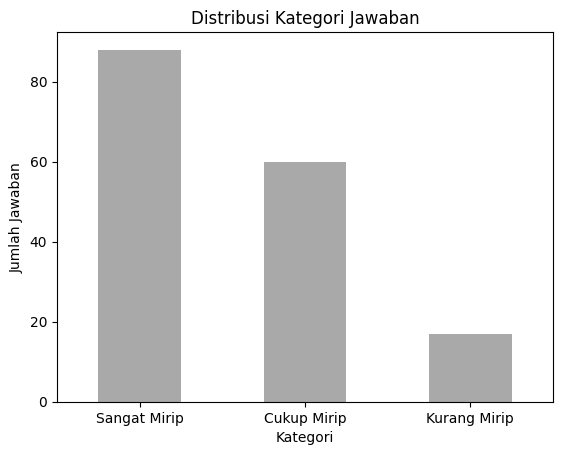

In [ ]:
import matplotlib.pyplot as plt

# Hitung frekuensi tiap kategori
frekuensi = cosine_df['kategori'].value_counts()

# Tampilkan distribusi frekuensi
print(frekuensi)

# Visualisasi dengan bar chart
frekuensi.plot(kind='bar', color='darkgrey')
plt.title('Distribusi Kategori Jawaban')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Jawaban')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Tampilkan distribusi kategori per pertanyaan (dengan label angka)
pertanyaan_unik = cosine_df['pertanyaan'].unique()

for i, pertanyaan in enumerate(pertanyaan_unik, start=1):
    subset = cosine_df[cosine_df['pertanyaan'] == pertanyaan]
    counts = subset['kategori'].value_counts().reset_index()
    counts.columns = ['Kategori', 'Jumlah']

    print(f"Pertanyaan {i}:")
    print(f"Teks asli: {pertanyaan}")
    for j, row in counts.iterrows():
        print(f"{j+1}. {row['Kategori']}: {row['Jumlah']}")
    print("-" * 40)


Pertanyaan 1:
Teks asli: apa dimaksud demam berdarah dengue
1. Sangat Mirip: 20
2. Cukup Mirip: 13
----------------------------------------
Pertanyaan 2:
Teks asli: apa gejala utama demam berdarah dengue
1. Sangat Mirip: 15
2. Cukup Mirip: 10
3. Kurang Mirip: 8
----------------------------------------
Pertanyaan 3:
Teks asli: apa penyebab utama penyakit demam berdarah dengue
1. Sangat Mirip: 17
2. Cukup Mirip: 12
3. Kurang Mirip: 4
----------------------------------------
Pertanyaan 4:
Teks asli: bagaimana cara penularan penyakit demam berdarah dengue terjadi
1. Sangat Mirip: 17
2. Cukup Mirip: 12
3. Kurang Mirip: 4
----------------------------------------
Pertanyaan 5:
Teks asli: apa solusi meningkatkan kepedulian masyarakat pencegahan demam berdarah dengue
1. Sangat Mirip: 19
2. Cukup Mirip: 13
3. Kurang Mirip: 1
----------------------------------------


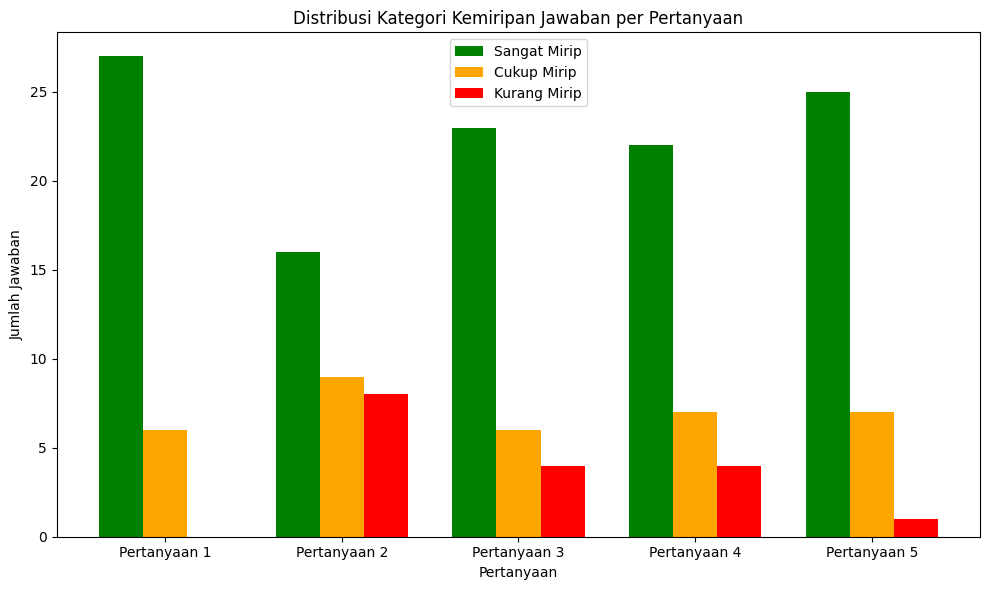

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 🔧 Data dinamis: ubah bagian ini jika datanya berubah
data = {
    'Pertanyaan 1': {'Sangat Mirip': 27, 'Cukup Mirip': 6, 'Kurang Mirip': 0},
    'Pertanyaan 2': {'Sangat Mirip': 16, 'Cukup Mirip': 9, 'Kurang Mirip': 8},
    'Pertanyaan 3': {'Sangat Mirip': 23, 'Cukup Mirip': 6, 'Kurang Mirip': 4},
    'Pertanyaan 4': {'Sangat Mirip': 22, 'Cukup Mirip': 7, 'Kurang Mirip': 4},
    'Pertanyaan 5': {'Sangat Mirip': 25, 'Cukup Mirip': 7, 'Kurang Mirip': 1},
}

# 📊 Konversi ke DataFrame
df = pd.DataFrame(data).T  # Transpose agar pertanyaan jadi sumbu x

# 🎨 Plot
colors = {'Sangat Mirip': 'green', 'Cukup Mirip': 'orange', 'Kurang Mirip': 'red'}
bar_width = 0.25
x = range(len(df))

plt.figure(figsize=(10, 6))

for idx, category in enumerate(df.columns):
    plt.bar([i + bar_width * idx for i in x], df[category],
            width=bar_width, label=category, color=colors[category])

plt.xticks([i + bar_width for i in x], df.index)
plt.xlabel('Pertanyaan')
plt.ylabel('Jumlah Jawaban')
plt.title('Distribusi Kategori Kemiripan Jawaban per Pertanyaan')
plt.legend()
plt.tight_layout()
plt.show()


#### Most Jawaban

In [ ]:
# Cari jawaban dengan cosine similarity tertinggi per pertanyaan
jawaban_terbaik = cosine_df.loc[cosine_df.groupby('pertanyaan')['cosine_similarity'].idxmax()]

# Tampilkan jawaban terbaik
jawaban_terbaik[['pertanyaan', 'responden', 'respon_jawaban', 'cosine_similarity']]


pertanyaan  \
1                                                apa dimaksud demam berdarah dengue   
35                                           apa gejala utama demam berdarah dengue   
93                                apa penyebab utama penyakit demam berdarah dengue   
133  apa solusi meningkatkan kepedulian masyarakat pencegahan demam berdarah dengue   
103                 bagaimana cara penularan penyakit demam berdarah dengue terjadi   

    responden  \
1          r2   
35         r3   
93        r28   
133        r2   
103        r5   

                                                                                                                                                                                                                                                    respon_jawaban  \
1             [demam, darah, dengue, sakit, sebab, virus, demam, darah, dengue, tular, lalu, gigit, nyamuk, aedes, aegypti, aegypti, sakit, tanda, demam, tinggi, nyeri, otot, sendi, ruam, kulit, bisa, sebab, darah, serius, hingga, mati, tidak, tangan, cepat]   
35                                                           [gejala, utama, demam, darah, dengue, liput, demam, tinggi, dadak, sakit, kepala, nyeri, otot, sendi, nyeri, belakang, mata, mual, muntah, bintik, merah, kulit, darah, ringan, mimisan, gusi, darah]   
93                                                                                                                          [sebab, utama, sakit, demam, darah, dengue, virus, demam, darah, dengue, tular, lalu, gigit, nyamuk, aedes, aegypti, aegypti, infeksi]   
133                                                                             [solusi, tingkat, peduli, masyarakat, cegah, demam, darah, dengue, dengan, ada, edukasi, rutin, kampanye, bersih, lingkung, suluh, tiga, m, libat, tokoh, masyarakat, giat, cegah]   
103  [tular, demam, darah, dengue, jadi, nyamuk, aedes, aegypti, aegypti, betina, infeksi, virus, demam, darah, dengue, gigit, manusia, kemudian, nyamuk, sehat, lain, gigit, orang, sudah, infeksi, jadi, bawa, virus, baru, cipta, siklus, tular, terus, lanjut]   

     cosine_similarity  
1             0.993777  
35            0.995322  
93            0.985774  
133           0.981760  
103           0.978627

In [ ]:
jawaban_terbaik['pertanyaan'].unique()

array(['apa dimaksud demam berdarah dengue',
       'apa gejala utama demam berdarah dengue',
       'apa penyebab utama penyakit demam berdarah dengue',
       'apa solusi meningkatkan kepedulian masyarakat pencegahan demam berdarah dengue',
       'bagaimana cara penularan penyakit demam berdarah dengue terjadi'],
      dtype=object)

In [ ]:
# Hitung rata-rata cosine similarity per responden
performansi_responden = cosine_df.groupby('responden')['cosine_similarity'].mean().reset_index()

# Urutkan dari performa terbaik ke terendah
performansi_responden = performansi_responden.sort_values(by='cosine_similarity', ascending=False)
performansi_responden


responden  cosine_similarity
11        r2           0.984383
17       r25           0.982209
22        r3           0.980587
21       r29           0.978430
30        r7           0.977326
0         r1           0.975327
20       r28           0.974462
28        r5           0.973941
27        r4           0.971623
14       r22           0.967068
15       r23           0.960314
12       r20           0.956581
7        r16           0.945109
4        r13           0.935696
6        r15           0.912366
25       r32           0.878548
18       r26           0.871261
19       r27           0.862183
26       r33           0.849417
32        r9           0.845354
13       r21           0.845132
2        r11           0.842335
31        r8           0.835727
8        r17           0.832675
29        r6           0.826449
3        r12           0.801830
16       r24           0.772061
23       r30           0.763397
1        r10           0.735934
24       r31           0.730067
9        r18           0.675465
5        r14           0.649163
10       r19           0.607904

In [ ]:
# # Menghitung cosine similarity antara embedding kalimat pertama dan embedding-embedding lainnya
# # Hasilnya akan berupa daftar skor similaritas antara kalimat pertama dan setiap kalimat lainnya
# similarity_scores = cosine_similarity([question_embeddings[ 0 ]], answer_embeddings[ 1 :])
# similarity_scores

In [ ]:
# bert_similarities = [cosine_similarity([question_embeddings[i]], [answer_embeddings[i]])[0][0] for i in range(len(df))]
# df['bert_cosine_similarity'] = bert_similarities
# bert_similarities

# **Social Network Analysis**

## Embedding Kolom Respon

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

# Mengambil model IndoBERT
model_name = "indolem/indobert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Fungsi untuk ubah teks jadi vektor
def buat_embedding(teks):
    # Tokenisasi
    inputs = tokenizer(teks, return_tensors="pt", truncation=True, padding=True)
    # Menjalankan model tanpa training (no_grad)
    with torch.no_grad():
        outputs = model(**inputs)
    # Mengmbil vektor dari token pertama ([CLS])
    return outputs.last_hidden_state[:, 0, :].squeeze().numpy()

# Mengabungkan kata-kata dalam jawaban jadi 1 kalimat
cosine_df['respon_jawaban'] = cosine_df['respon_jawaban'].apply(lambda x: ' '.join(x))

# Membuat vektor untuk setiap jawaban
cosine_df['respon_embedding'] = cosine_df['respon_jawaban'].apply(buat_embedding)
cosine_df[['pertanyaan', 'responden', 'respon_jawaban', 'respon_embedding']]


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/234k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

pertanyaan  \
0                                                apa dimaksud demam berdarah dengue   
1                                                apa dimaksud demam berdarah dengue   
2                                                apa dimaksud demam berdarah dengue   
3                                                apa dimaksud demam berdarah dengue   
4                                                apa dimaksud demam berdarah dengue   
5                                                apa dimaksud demam berdarah dengue   
6                                                apa dimaksud demam berdarah dengue   
7                                                apa dimaksud demam berdarah dengue   
8                                                apa dimaksud demam berdarah dengue   
9                                                apa dimaksud demam berdarah dengue   
10                                               apa dimaksud demam berdarah dengue   
11                                               apa dimaksud demam berdarah dengue   
12                                               apa dimaksud demam berdarah dengue   
13                                               apa dimaksud demam berdarah dengue   
14                                               apa dimaksud demam berdarah dengue   
15                                               apa dimaksud demam berdarah dengue   
16                                               apa dimaksud demam berdarah dengue   
17                                               apa dimaksud demam berdarah dengue   
18                                               apa dimaksud demam berdarah dengue   
19                                               apa dimaksud demam berdarah dengue   
20                                               apa dimaksud demam berdarah dengue   
21                                               apa dimaksud demam berdarah dengue   
22                                               apa dimaksud demam berdarah dengue   
23                                               apa dimaksud demam berdarah dengue   
24                                               apa dimaksud demam berdarah dengue   
25                                               apa dimaksud demam berdarah dengue   
26                                               apa dimaksud demam berdarah dengue   
27                                               apa dimaksud demam berdarah dengue   
28                                               apa dimaksud demam berdarah dengue   
29                                               apa dimaksud demam berdarah dengue   
30                                               apa dimaksud demam berdarah dengue   
31                                               apa dimaksud demam berdarah dengue   
32                                               apa dimaksud demam berdarah dengue   
33                                           apa gejala utama demam berdarah dengue   
34                                           apa gejala utama demam berdarah dengue   
35                                           apa gejala utama demam berdarah dengue   
36                                           apa gejala utama demam berdarah dengue   
37                                           apa gejala utama demam berdarah dengue   
38                                           apa gejala utama demam berdarah dengue   
39                                           apa gejala utama demam berdarah dengue   
40                                           apa gejala utama demam berdarah dengue   
41                                           apa gejala utama demam berdarah dengue   
42                                           apa gejala utama demam berdarah dengue   
43                                           apa gejala utama demam berdarah dengue   
44                                           apa gejala utama demam berdarah dengue   
45                                           apa gejala utama demam ber

In [ ]:
import numpy as np

# Filter data berdasarkan pertanyaan tertentu
pertanyaan = 'apa dimaksud demam berdarah dengue'
pertanyaan_df = cosine_df[cosine_df['pertanyaan'] == pertanyaan]

# Buat list semua embedding responden (misalnya kolomnya 'respon_embedding')
embeddings = []

for i in range(len(pertanyaan_df)):
    emb = pertanyaan_df.iloc[i]['respon_embedding']  # Pastikan kolom ini berisi vector, bukan string
    embeddings.append(np.array(emb))


In [ ]:
cosine_df

pertanyaan  \
0                                                apa dimaksud demam berdarah dengue   
1                                                apa dimaksud demam berdarah dengue   
2                                                apa dimaksud demam berdarah dengue   
3                                                apa dimaksud demam berdarah dengue   
4                                                apa dimaksud demam berdarah dengue   
5                                                apa dimaksud demam berdarah dengue   
6                                                apa dimaksud demam berdarah dengue   
7                                                apa dimaksud demam berdarah dengue   
8                                                apa dimaksud demam berdarah dengue   
9                                                apa dimaksud demam berdarah dengue   
10                                               apa dimaksud demam berdarah dengue   
11                                               apa dimaksud demam berdarah dengue   
12                                               apa dimaksud demam berdarah dengue   
13                                               apa dimaksud demam berdarah dengue   
14                                               apa dimaksud demam berdarah dengue   
15                                               apa dimaksud demam berdarah dengue   
16                                               apa dimaksud demam berdarah dengue   
17                                               apa dimaksud demam berdarah dengue   
18                                               apa dimaksud demam berdarah dengue   
19                                               apa dimaksud demam berdarah dengue   
20                                               apa dimaksud demam berdarah dengue   
21                                               apa dimaksud demam berdarah dengue   
22                                               apa dimaksud demam berdarah dengue   
23                                               apa dimaksud demam berdarah dengue   
24                                               apa dimaksud demam berdarah dengue   
25                                               apa dimaksud demam berdarah dengue   
26                                               apa dimaksud demam berdarah dengue   
27                                               apa dimaksud demam berdarah dengue   
28                                               apa dimaksud demam berdarah dengue   
29                                               apa dimaksud demam berdarah dengue   
30                                               apa dimaksud demam berdarah dengue   
31                                               apa dimaksud demam berdarah dengue   
32                                               apa dimaksud demam berdarah dengue   
33                                           apa gejala utama demam berdarah dengue   
34                                           apa gejala utama demam berdarah dengue   
35                                           apa gejala utama demam berdarah dengue   
36                                           apa gejala utama demam berdarah dengue   
37                                           apa gejala utama demam berdarah dengue   
38                                           apa gejala utama demam berdarah dengue   
39                                           apa gejala utama demam berdarah dengue   
40                                           apa gejala utama demam berdarah dengue   
41                                           apa gejala utama demam berdarah dengue   
42                                           apa gejala utama demam berdarah dengue   
43                                           apa gejala utama demam berdarah dengue   
44                                           apa gejala utama demam berdarah dengue   
45                                           apa gejala utama demam ber

## Proses SNA

 Filter pertanyaan tertentu

In [ ]:
# Filter hanya untuk satu pertanyaan
pertanyaan_df = cosine_df[cosine_df['pertanyaan'] == 'apa dimaksud demam berdarah dengue'].reset_index(drop=True)

# Filter hanya untuk satu pertanyaan
pertanyaan_df2 = cosine_df[cosine_df['pertanyaan'] == 'apa gejala utama demam berdarah dengue'].reset_index(drop=True)

# Filter hanya untuk satu pertanyaan
pertanyaan_df3 = cosine_df[cosine_df['pertanyaan'] == 'apa penyebab utama penyakit demam berdarah dengue'].reset_index(drop=True)

# Filter hanya untuk satu pertanyaan
pertanyaan_df4 = cosine_df[cosine_df['pertanyaan'] == 'bagaimana cara penularan penyakit demam berdarah dengue terjadi'].reset_index(drop=True)
# Filter hanya untuk satu pertanyaan
pertanyaan_df5= cosine_df[cosine_df['pertanyaan'] == 'apa solusi meningkatkan kepedulian masyarakat pencegahan demam berdarah dengue'].reset_index(drop=True)

In [ ]:
pertanyaan_df

pertanyaan  \
0   apa dimaksud demam berdarah dengue   
1   apa dimaksud demam berdarah dengue   
2   apa dimaksud demam berdarah dengue   
3   apa dimaksud demam berdarah dengue   
4   apa dimaksud demam berdarah dengue   
5   apa dimaksud demam berdarah dengue   
6   apa dimaksud demam berdarah dengue   
7   apa dimaksud demam berdarah dengue   
8   apa dimaksud demam berdarah dengue   
9   apa dimaksud demam berdarah dengue   
10  apa dimaksud demam berdarah dengue   
11  apa dimaksud demam berdarah dengue   
12  apa dimaksud demam berdarah dengue   
13  apa dimaksud demam berdarah dengue   
14  apa dimaksud demam berdarah dengue   
15  apa dimaksud demam berdarah dengue   
16  apa dimaksud demam berdarah dengue   
17  apa dimaksud demam berdarah dengue   
18  apa dimaksud demam berdarah dengue   
19  apa dimaksud demam berdarah dengue   
20  apa dimaksud demam berdarah dengue   
21  apa dimaksud demam berdarah dengue   
22  apa dimaksud demam berdarah dengue   
23  apa dimaksud demam berdarah dengue   
24  apa dimaksud demam berdarah dengue   
25  apa dimaksud demam berdarah dengue   
26  apa dimaksud demam berdarah dengue   
27  apa dimaksud demam berdarah dengue   
28  apa dimaksud demam berdarah dengue   
29  apa dimaksud demam berdarah dengue   
30  apa dimaksud demam berdarah dengue   
31  apa dimaksud demam berdarah dengue   
32  apa dimaksud demam berdarah dengue   

                                                                                                                                                                                                                                           respon_jawaban  \
0                                                                                                       demam darah dengue sakit infeksi virus akut sebab virus demam darah dengue tular lalu gigit nyamuk aedes aegypti aegypti aedes aegypti albopictus   
1                                       demam darah dengue sakit sebab virus demam darah dengue tular lalu gigit nyamuk aedes aegypti aegypti sakit tanda demam tinggi nyeri otot sendi ruam kulit bisa sebab darah serius hingga mati tidak tangan cepat   
2                                                                                                                                     demam darah dengue sakit tular sebab virus demam darah dengue tular lalu gigit nyamuk aedes aegypti aegypti infeksi   
3                                                                                                       demam darah dengue sakit infeksi virus akut sebab virus demam darah dengue tular lalu gigit nyamuk aedes aegypti aegypti aedes aegypti albopictus   
4                                                                                                                   demam darah dengue sakit infeksi virus demam darah dengue tular nyamuk aedes aegypti sebab demam tinggi darah bisa fatal tidak tangan   
5                                                                                                                                                                                                         sakit bahaya sebab nyamuk aedes aegypti aegypti   
6                                                                                                                                   demam darah dengue sakit infeksi sebab virus demam darah dengue sebar lalu gigit nyamuk aedes aegypti aegypti infeksi   
7                                                                                                                                                                                                    sakit demam sebab nyamuk aedes aegypti aedes aegypti   
8                                                                                                                                                                                                                  demam parah sebab nyamuk aedes aegypti   
9                                                                    

#### 1. Mengambil dan susun embedding

In [ ]:
import numpy as np

# Pastikan semua embedding dalam bentuk array
embeddings = [np.array(e) for e in pertanyaan_df['respon_embedding']]

#pertanyaan 2
embeddings2 = [np.array(e) for e in pertanyaan_df2['respon_embedding']]

#pertanyaan 3
embeddings3 = [np.array(e) for e in pertanyaan_df3['respon_embedding']]

#pertanyaan 4
embeddings4 = [np.array(e) for e in pertanyaan_df4['respon_embedding']]

#pertanyaan 5
embeddings5 = [np.array(e) for e in pertanyaan_df5['respon_embedding']]

#### 2. Hitung cosine similarity antar responden

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Gabungkan dan hitung similarity matrix
similarity_matrix = cosine_similarity(np.vstack(embeddings))

#pertanyaan 2
similarity_matrix2 = cosine_similarity(np.vstack(embeddings2))

#pertanyaan 3
similarity_matrix3 = cosine_similarity(np.vstack(embeddings3))

#pertanyaan4
similarity_matrix4 = cosine_similarity(np.vstack(embeddings4))

#pertanyaan 5
similarity_matrix5 = cosine_similarity(np.vstack(embeddings5))

#### 3. Bangun Graph (SNA)

In [ ]:
import numpy as np
import networkx as nx

# Fungsi untuk buat graph dari dataframe dan similarity matrix
def buat_graph(df, similarity_matrix, threshold=0.75):
    G = nx.Graph()

    # Tambahkan node dari kolom 'responden'
    for i in range(len(df)):
        G.add_node(df.iloc[i]['responden'])

    # Tambahkan edge jika similarity > threshold
    for i in range(len(df)):
        for j in range(i+1, len(df)):
            sim = similarity_matrix[i, j]
            if sim > threshold:
                r1 = df.iloc[i]['responden']
                r2 = df.iloc[j]['responden']
                G.add_edge(r1, r2, weight=sim)
    return G

# Contoh pemanggilan dengan threshold 0.6
threshold_value = 0.6

G1 = buat_graph(pertanyaan_df, similarity_matrix, threshold=threshold_value) #pertanyaan 1
G2 = buat_graph(pertanyaan_df2, similarity_matrix2, threshold=threshold_value) #pertanyaan 2
G3 = buat_graph(pertanyaan_df3, similarity_matrix3, threshold=threshold_value) #pertanyaan 3
G4 = buat_graph(pertanyaan_df4, similarity_matrix4, threshold=threshold_value) #pertanyaan 4
G5 = buat_graph(pertanyaan_df5, similarity_matrix5, threshold=threshold_value) #pertanyaan 5


In [ ]:
# import networkx as nx

# # Fungsi untuk buat graph dari dataframe dan similarity matrix
# def buat_graph(df, similarity_matrix, threshold=0.75):
#     G = nx.Graph()

#     # Tambahkan node dari kolom 'responden'
#     for i in range(len(df)):
#         G.add_node(df.iloc[i]['responden'])

#     # Tambahkan edge jika similarity > threshold
#     for i in range(len(df)):
#         for j in range(i+1, len(df)):
#             sim = similarity_matrix[i, j]
#             if sim > threshold:
#                 r1 = df.iloc[i]['responden']
#                 r2 = df.iloc[j]['responden']
#                 G.add_edge(r1, r2, weight=sim)
#     return G

# # Buat graph untuk setiap dataframe dan similarity matrix
# G1 = buat_graph(pertanyaan_df, similarity_matrix)
# G2 = buat_graph(pertanyaan_df2, similarity_matrix2)
# G3 = buat_graph(pertanyaan_df3, similarity_matrix3)
# G4 = buat_graph(pertanyaan_df4, similarity_matrix4)
# G5 = buat_graph(pertanyaan_df5, similarity_matrix5)


#### 4. Visualisasi SNA

##### Semua edge

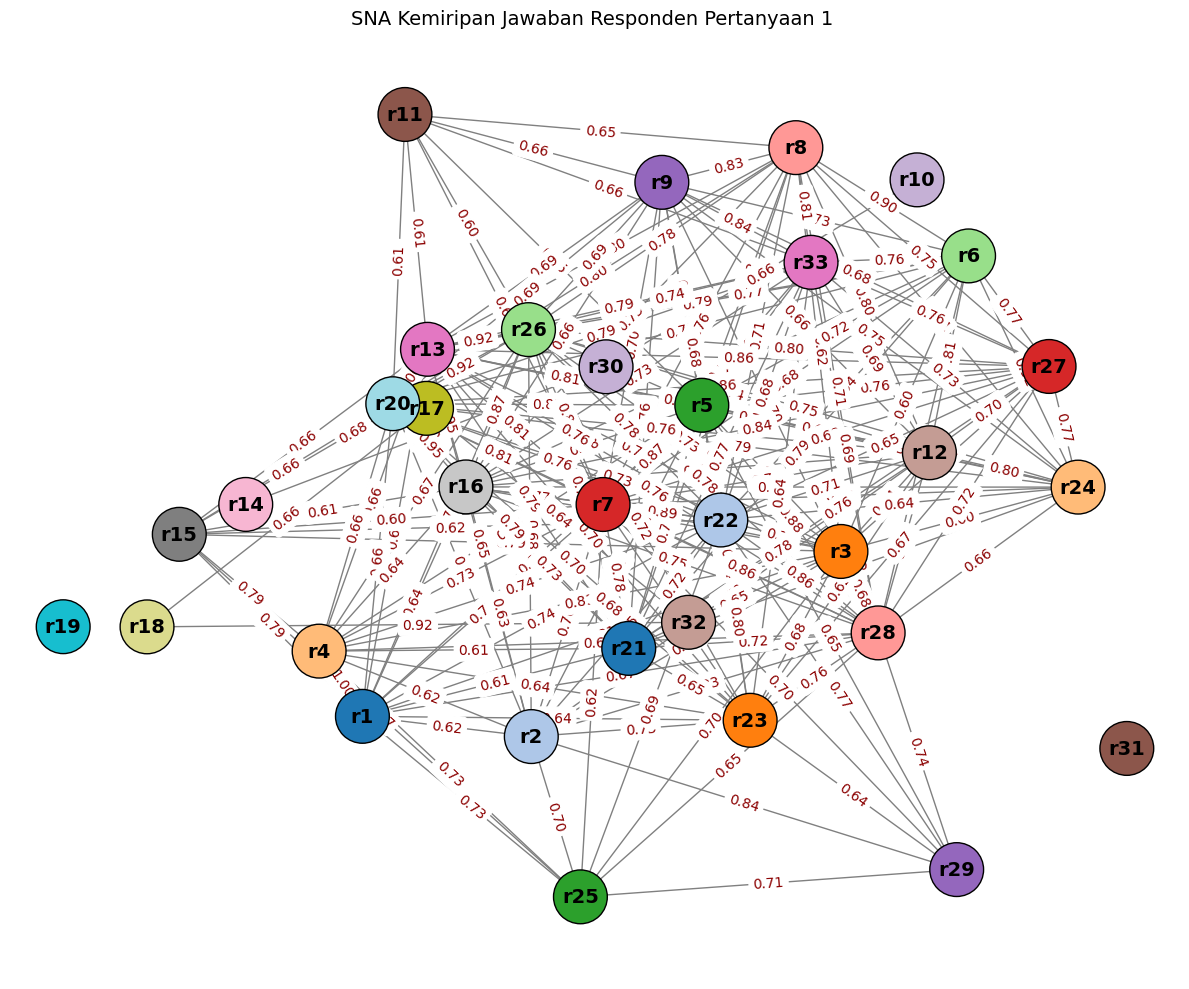

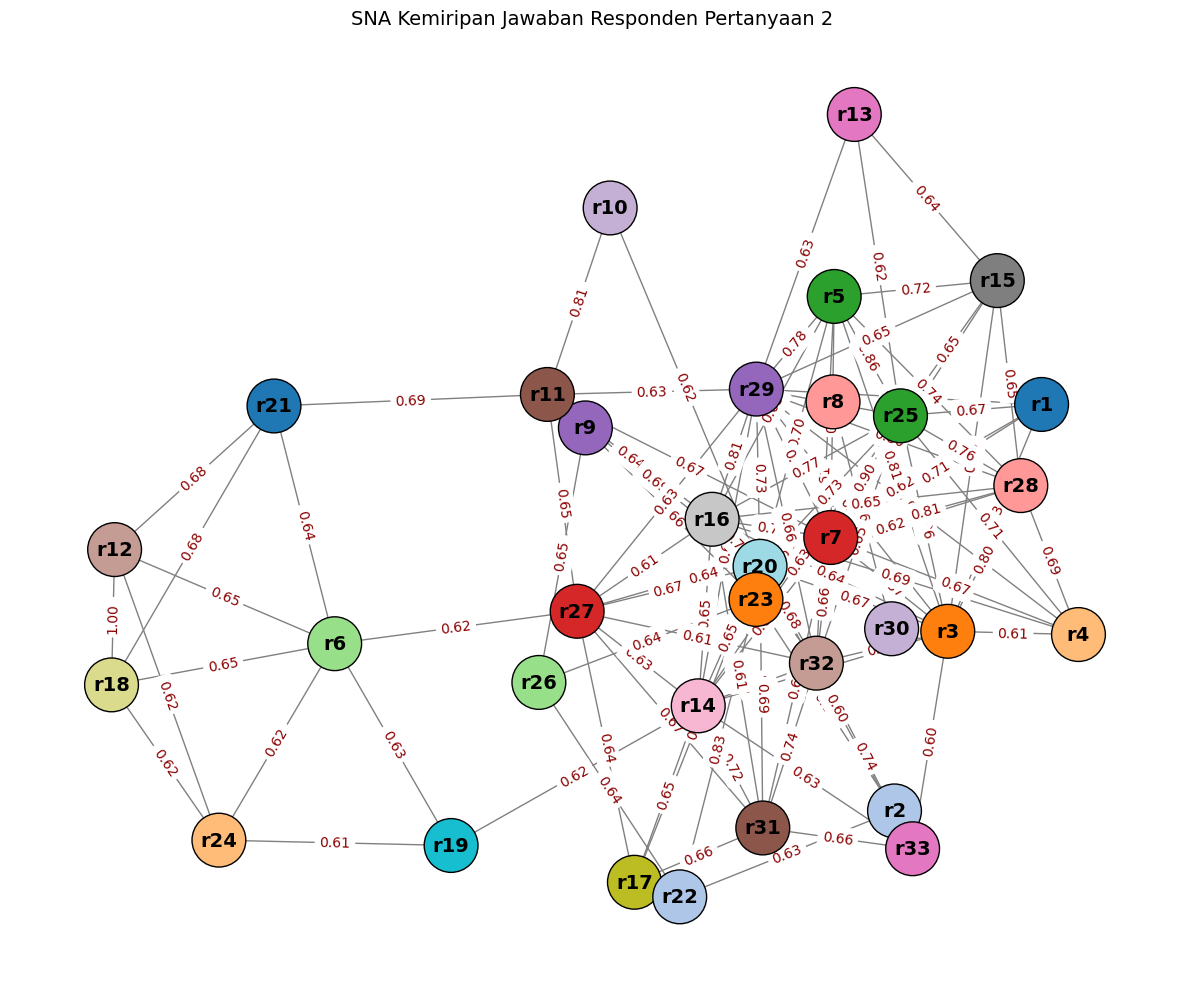

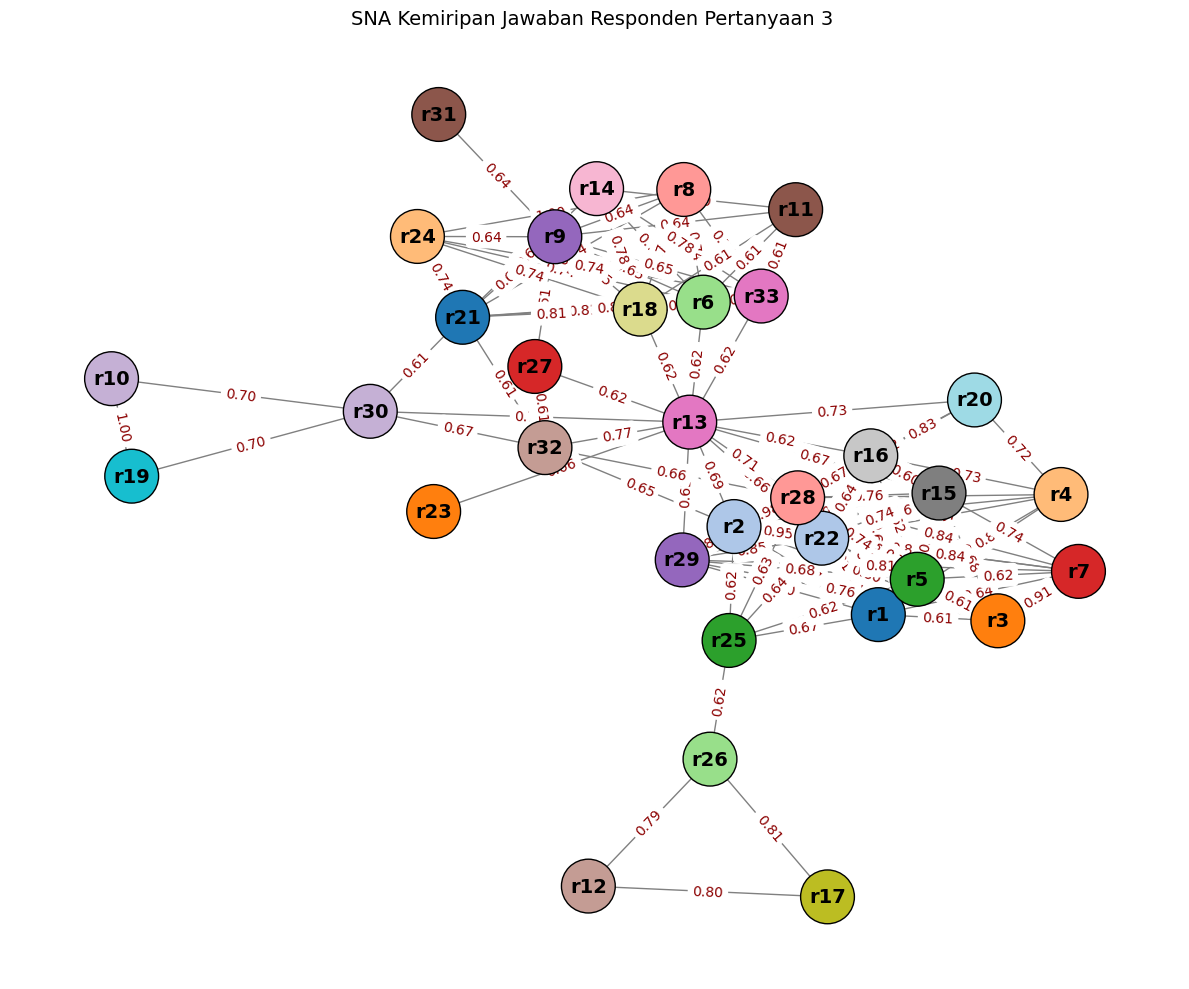

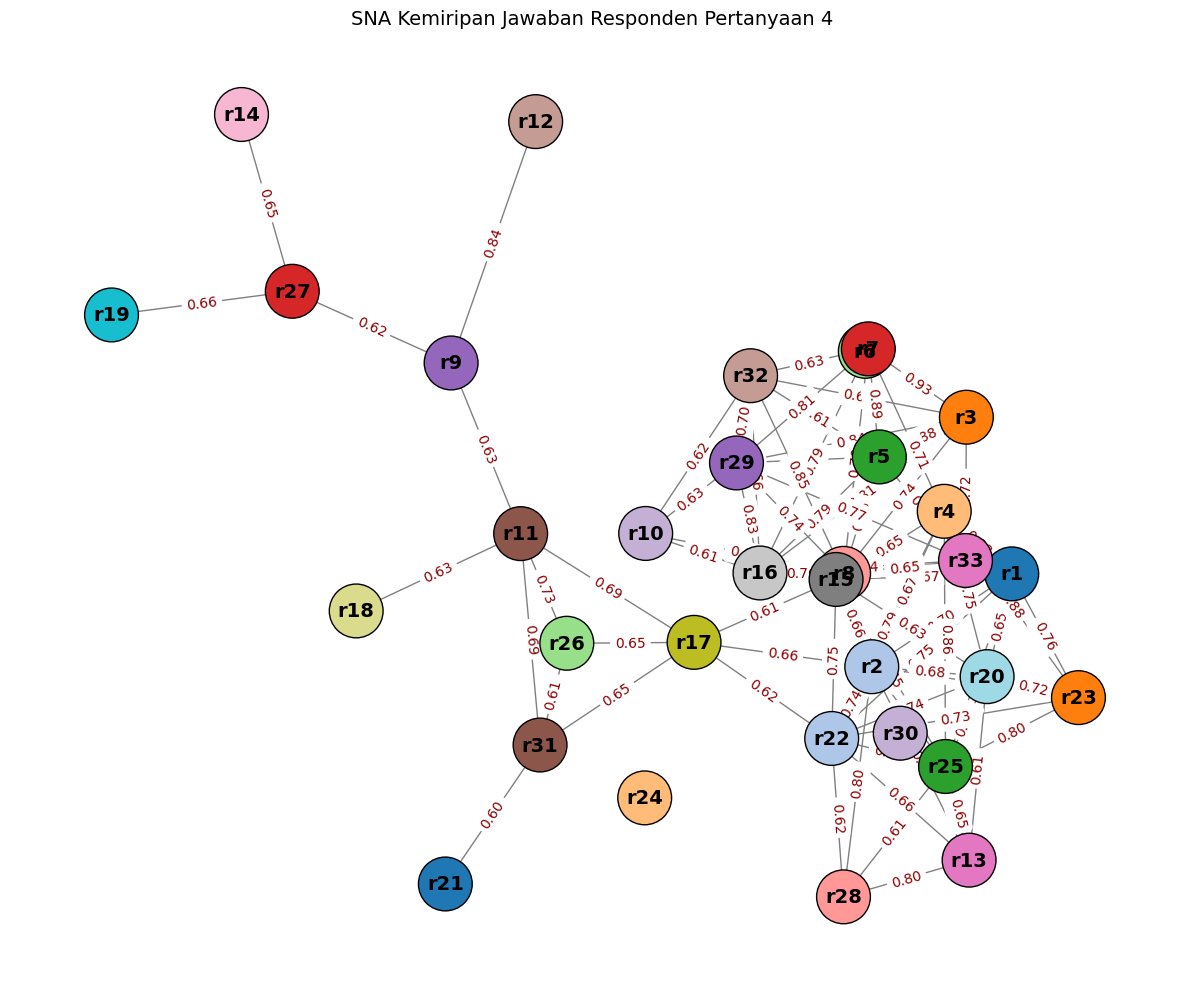

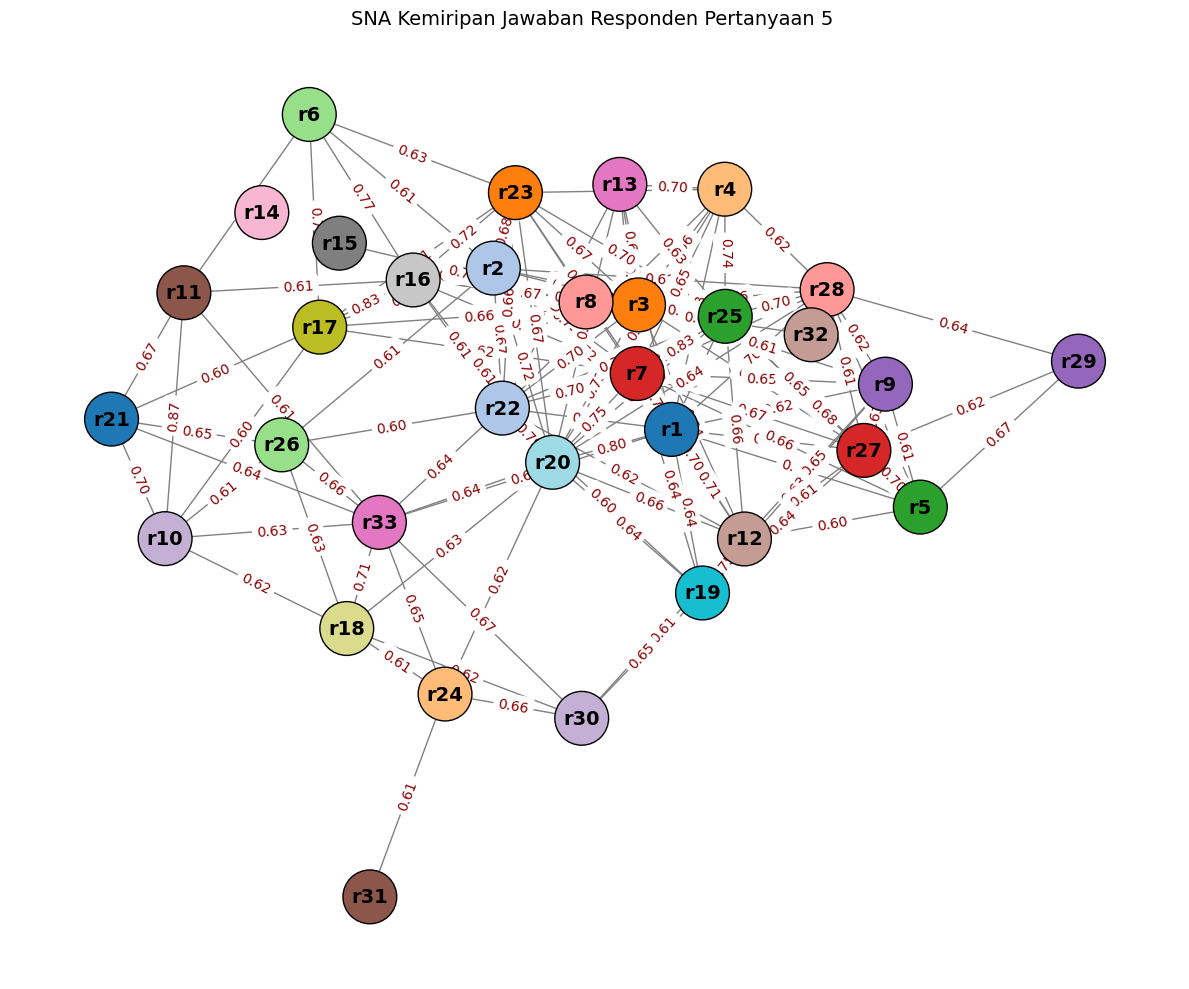

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

graphs = [G1, G2, G3, G4, G5]
titles = [
    "SNA Kemiripan Jawaban Responden Pertanyaan 1 ",
    "SNA Kemiripan Jawaban Responden Pertanyaan 2 ",
    "SNA Kemiripan Jawaban Responden Pertanyaan 3 ",
    "SNA Kemiripan Jawaban Responden Pertanyaan 4 ",
    "SNA Kemiripan Jawaban Responden Pertanyaan 5 ",
]

for i, G in enumerate(graphs):
    plt.figure(figsize=(12, 10))
    pos = nx.kamada_kawai_layout(G)

    nodes = list(G.nodes())
    colors = [plt.cm.tab20(j % 20) for j in range(len(nodes))]

    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=1500, edgecolors='black')
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    formatted_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_labels, font_color='darkred', font_size=10)

    plt.title(titles[i], fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


##### 10 edge

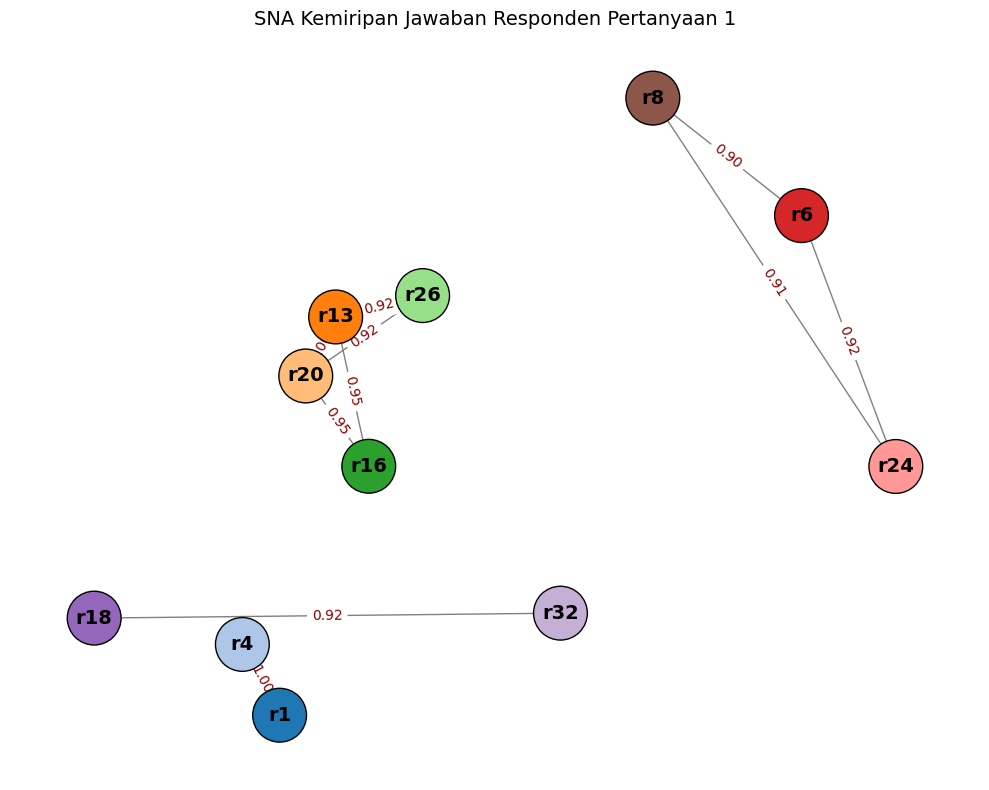

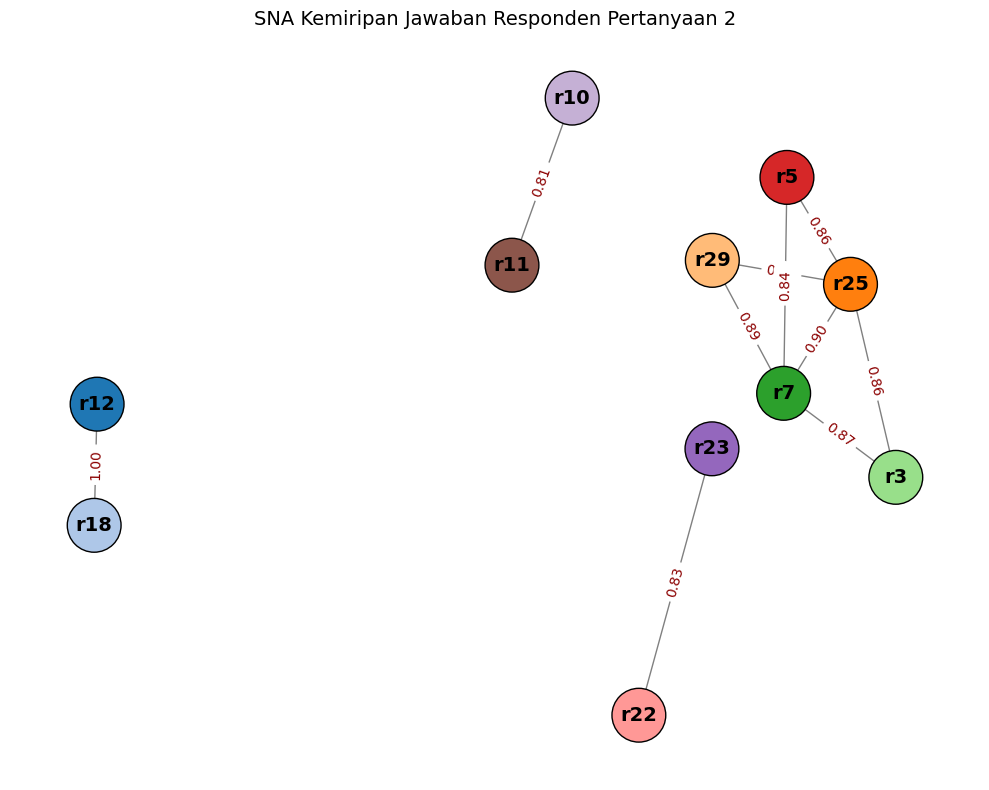

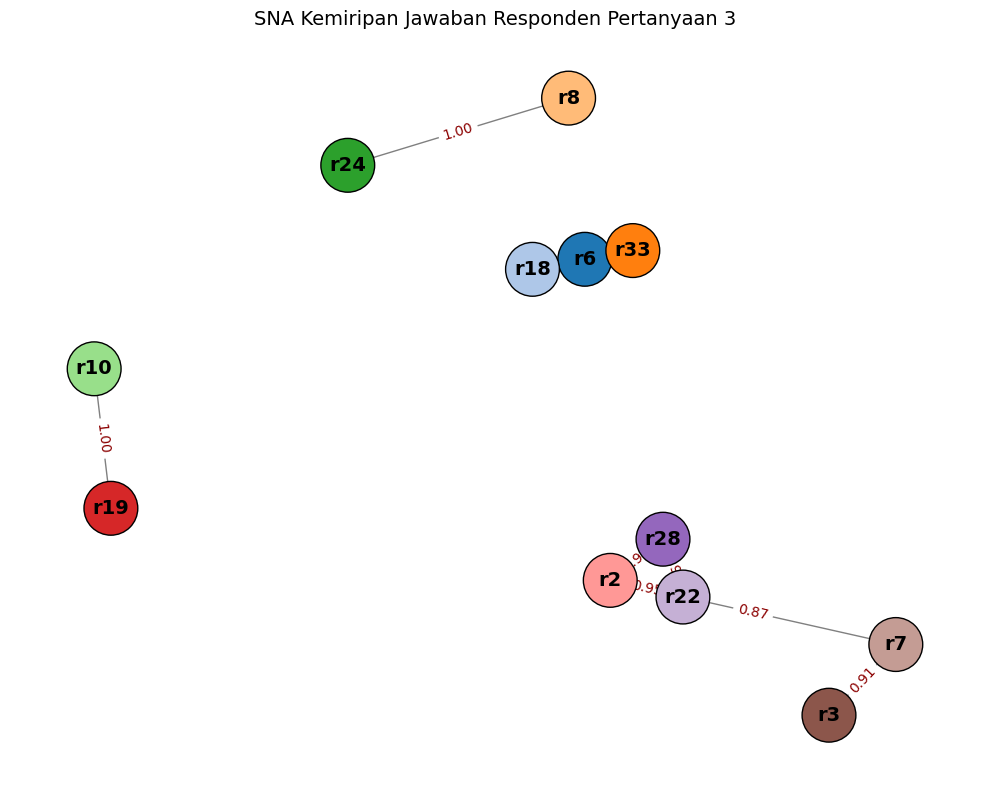

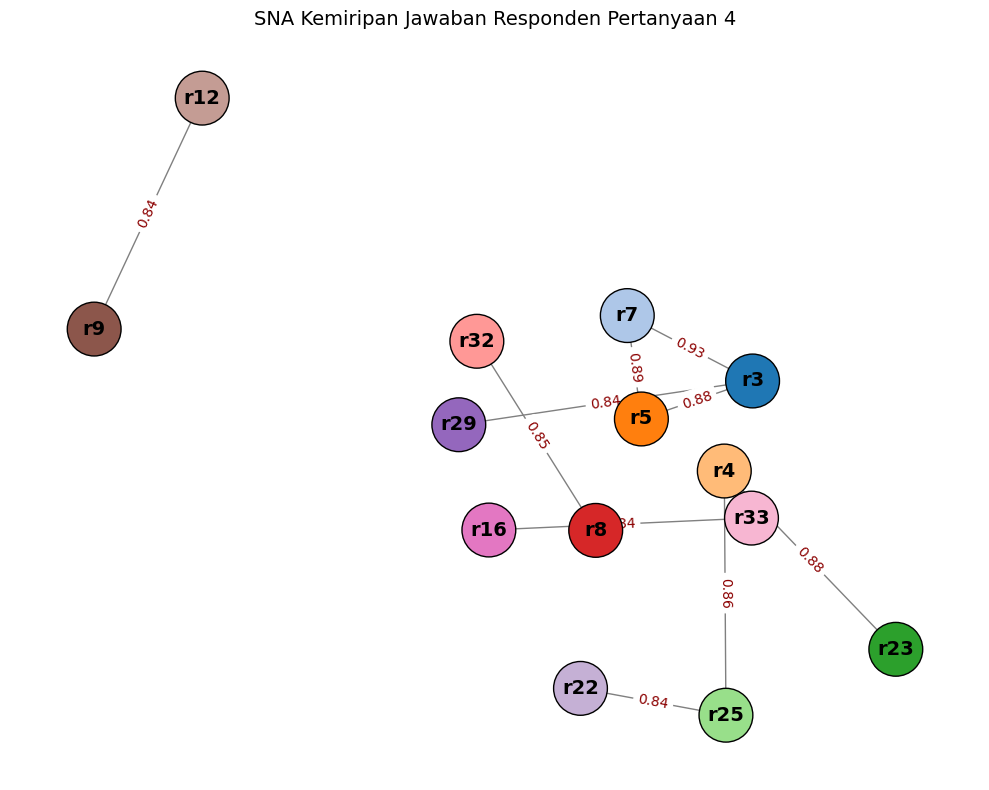

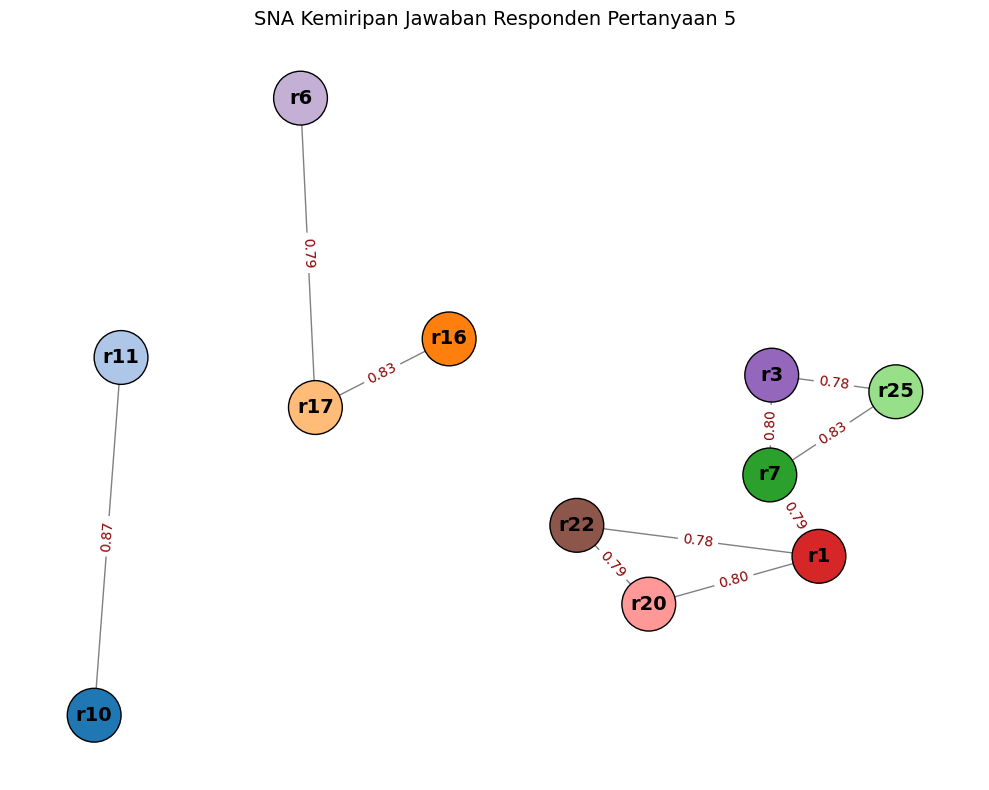

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

graphs = [G1, G2, G3, G4, G5]
titles = [
    "SNA Kemiripan Jawaban Responden Pertanyaan 1",
    "SNA Kemiripan Jawaban Responden Pertanyaan 2",
    "SNA Kemiripan Jawaban Responden Pertanyaan 3",
    "SNA Kemiripan Jawaban Responden Pertanyaan 4",
    "SNA Kemiripan Jawaban Responden Pertanyaan 5",
]

for i, G in enumerate(graphs):
    plt.figure(figsize=(10, 8))
    pos = nx.kamada_kawai_layout(G)

    # Ambil 10 edge dengan bobot (cosine similarity) tertinggi
    top_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
    top_edge_list = [(u, v) for u, v, d in top_edges]

    # Buat subgraph hanya dengan edge tersebut (untuk memudahkan plotting)
    subG = nx.Graph()
    subG.add_edges_from([(u, v, d) for u, v, d in top_edges])
    pos_sub = {node: pos[node] for node in subG.nodes()}

    # Warna untuk node
    nodes = list(subG.nodes())
    colors = [plt.cm.tab20(j % 20) for j in range(len(nodes))]

    nx.draw_networkx_nodes(subG, pos_sub, node_color=colors, node_size=1500, edgecolors='black')
    nx.draw_networkx_edges(subG, pos_sub, edge_color='gray')
    nx.draw_networkx_labels(subG, pos_sub, font_size=14, font_weight='bold')

    # Label edge
    edge_labels = nx.get_edge_attributes(subG, 'weight')
    formatted_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
    nx.draw_networkx_edge_labels(subG, pos_sub, edge_labels=formatted_labels, font_color='darkred', font_size=10)

    plt.title(titles[i], fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


##### 5 edge

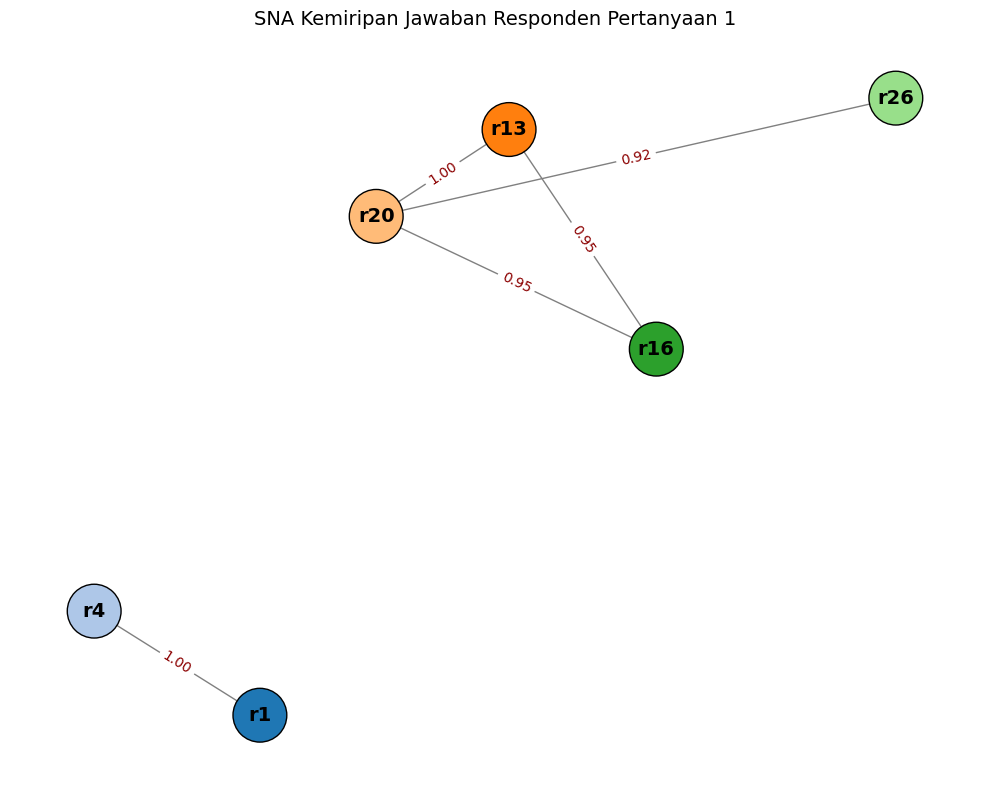

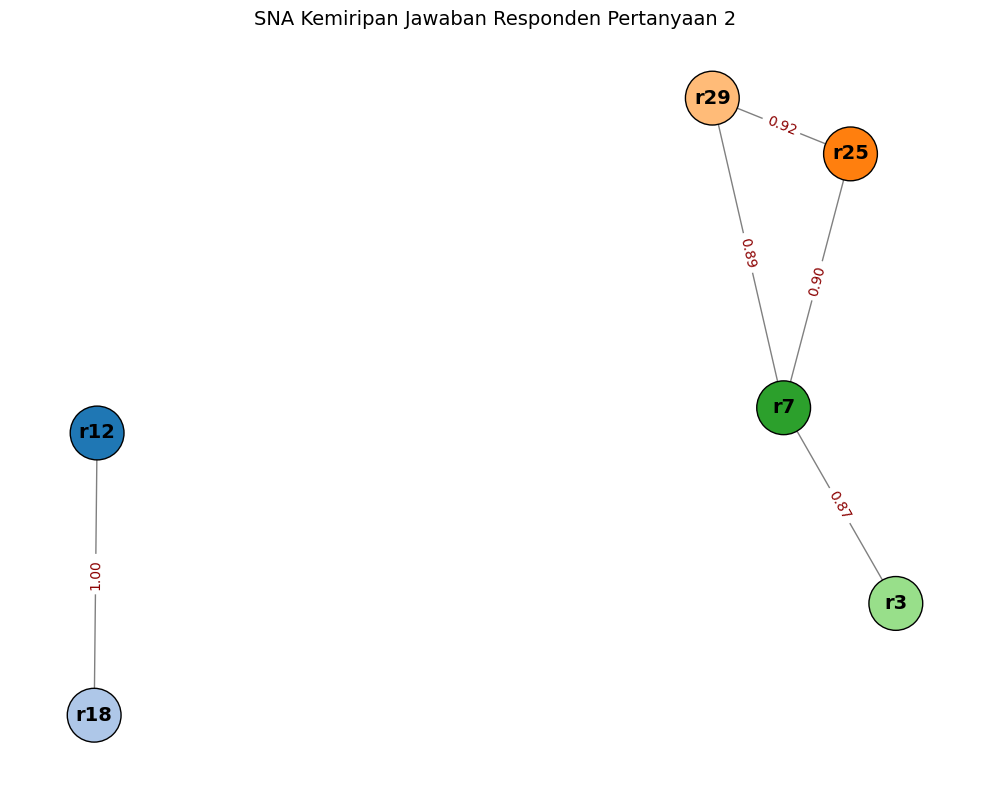

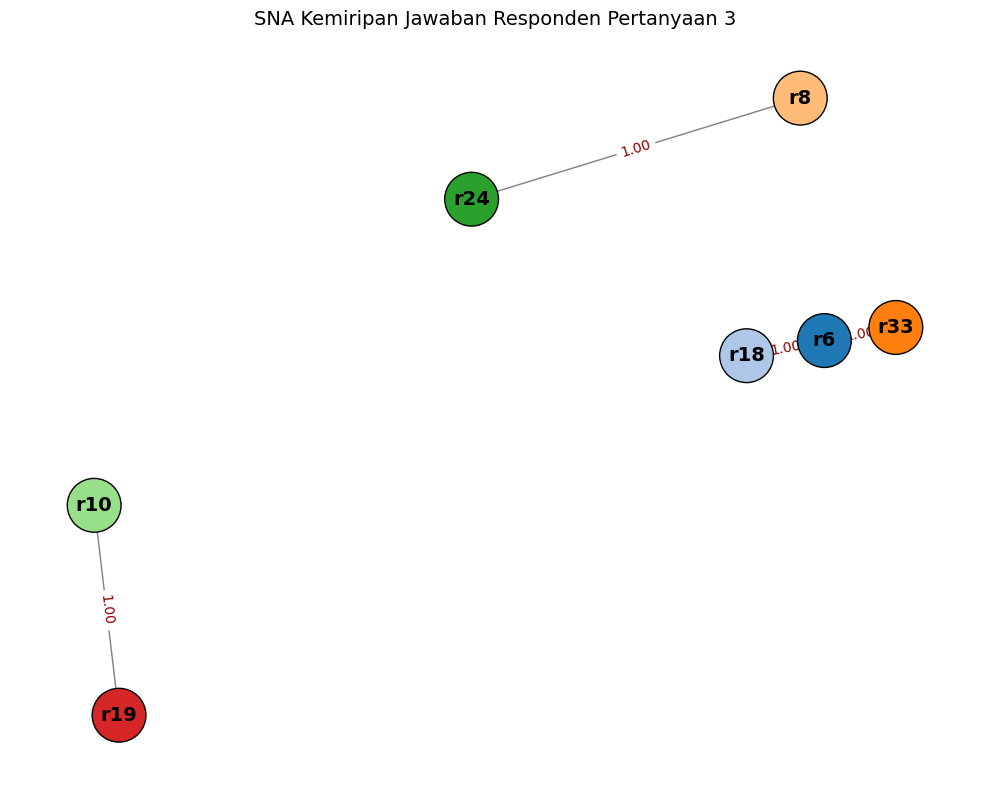

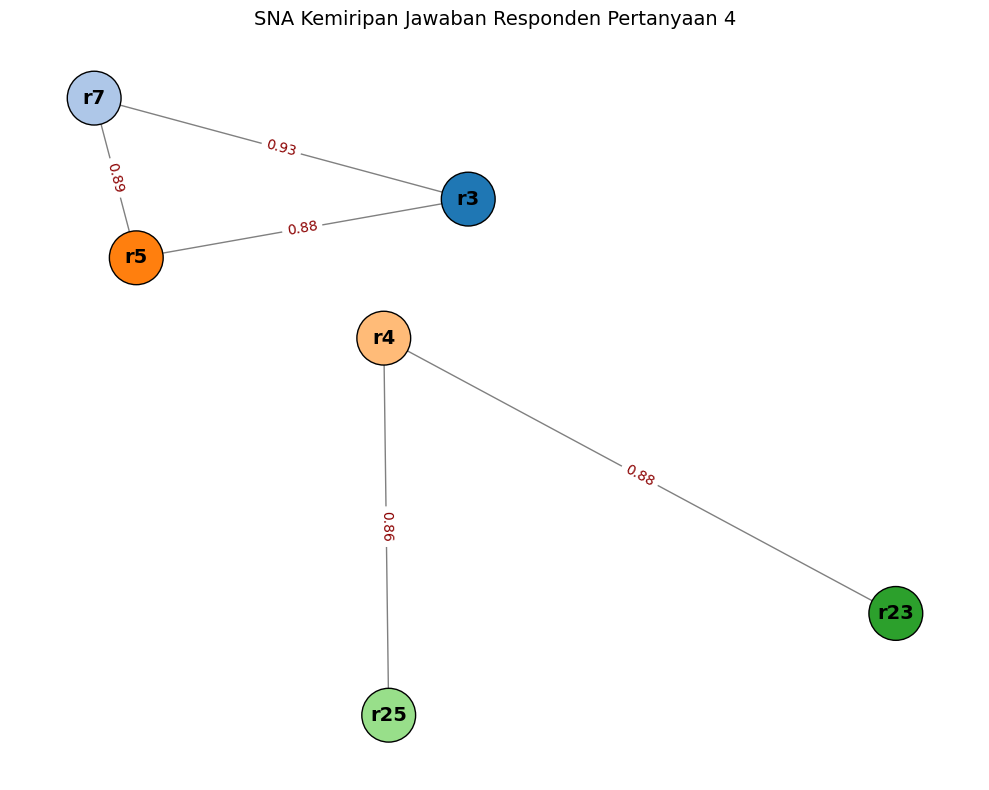

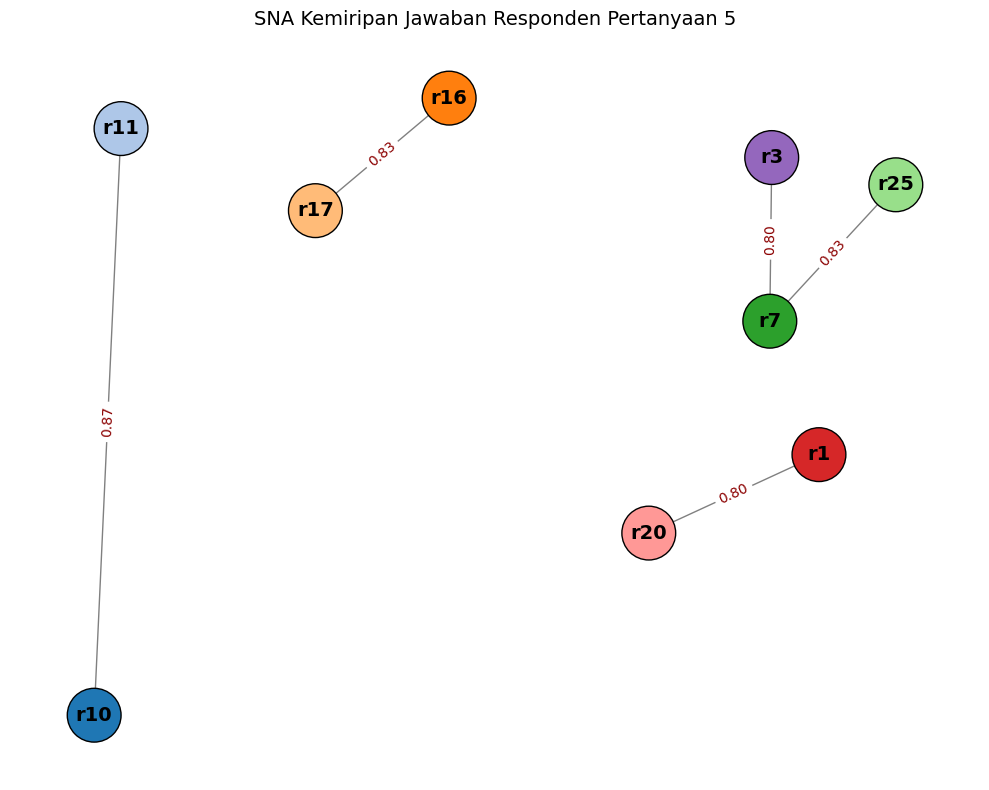

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

graphs = [G1, G2, G3, G4, G5]
titles = [
    "SNA Kemiripan Jawaban Responden Pertanyaan 1",
    "SNA Kemiripan Jawaban Responden Pertanyaan 2",
    "SNA Kemiripan Jawaban Responden Pertanyaan 3",
    "SNA Kemiripan Jawaban Responden Pertanyaan 4",
    "SNA Kemiripan Jawaban Responden Pertanyaan 5",
]

for i, G in enumerate(graphs):
    plt.figure(figsize=(10, 8))
    pos = nx.kamada_kawai_layout(G)

    # Ambil 10 edge dengan bobot (cosine similarity) tertinggi
    top_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:5]
    top_edge_list = [(u, v) for u, v, d in top_edges]

    # Buat subgraph hanya dengan edge tersebut (untuk memudahkan plotting)
    subG = nx.Graph()
    subG.add_edges_from([(u, v, d) for u, v, d in top_edges])
    pos_sub = {node: pos[node] for node in subG.nodes()}

    # Warna untuk node
    nodes = list(subG.nodes())
    colors = [plt.cm.tab20(j % 20) for j in range(len(nodes))]

    nx.draw_networkx_nodes(subG, pos_sub, node_color=colors, node_size=1500, edgecolors='black')
    nx.draw_networkx_edges(subG, pos_sub, edge_color='gray')
    nx.draw_networkx_labels(subG, pos_sub, font_size=14, font_weight='bold')

    # Label edge
    edge_labels = nx.get_edge_attributes(subG, 'weight')
    formatted_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
    nx.draw_networkx_edge_labels(subG, pos_sub, edge_labels=formatted_labels, font_color='darkred', font_size=10)

    plt.title(titles[i], fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import networkx as nx

# plt.figure(figsize=(8, 6))  # Perbesar canvas

# # Layout yang lebih rapi
# pos = nx.kamada_kawai_layout(G)  # atau spring_layout dengan k besar

# # Buat node warna-warni
# nodes = list(G.nodes())
# colors = [plt.cm.tab20(i % 20) for i in range(len(nodes))]

# # Gambar node, edge, dan label
# nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=1500, edgecolors='black')
# nx.draw_networkx_edges(G, pos, edge_color='gray')
# nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

# # Edge label (cosine similarity)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# formatted_labels = {k: f"{v:.2f}" for k, v in edge_labels.items()}
# nx.draw_networkx_edge_labels(G, pos, edge_labels=formatted_labels, font_color='darkred', font_size=10)

# # Hapus axis dan tampilkan judul
# plt.title("SNA Kemiripan Jawaban Pertanyaan 1 Responden", fontsize=14)
# plt.axis('off')
# plt.tight_layout()
# plt.show()


In [ ]:
import networkx as nx

# Fungsi untuk hitung dan tampilkan centrality per graph
def tampilkan_centrality(G, judul=""):
    centrality = nx.degree_centrality(G)
    centrality_sorted = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

    print(f"\nTop Centrality untuk {judul}")
    for node, score in centrality_sorted:
        print(f"{node}: {score:.3f}")

# Tampilkan hasil centrality masing-masing graph
tampilkan_centrality(G1, "Pertanyaan 1")
tampilkan_centrality(G2, "Pertanyaan 2")
tampilkan_centrality(G3, "Pertanyaan 3")
tampilkan_centrality(G4, "Pertanyaan 4")
tampilkan_centrality(G5, "Pertanyaan 5")



Top Centrality untuk Pertanyaan 1
r7: 0.750
r22: 0.719
r5: 0.688
r13: 0.688
r20: 0.688
r26: 0.688
r28: 0.688
r16: 0.656
r3: 0.625
r21: 0.594
r12: 0.562
r8: 0.531
r23: 0.531
r27: 0.531
r33: 0.531
r6: 0.500
r9: 0.500
r24: 0.500
r1: 0.469
r2: 0.469
r4: 0.469
r15: 0.312
r25: 0.281
r11: 0.250
r29: 0.219
r17: 0.062
r18: 0.062
r30: 0.062
r32: 0.062
r10: 0.031
r14: 0.031
r19: 0.000
r31: 0.000

Top Centrality untuk Pertanyaan 2
r20: 0.500
r7: 0.469
r29: 0.469
r3: 0.406
r16: 0.406
r25: 0.406
r14: 0.375
r32: 0.344
r27: 0.312
r5: 0.281
r28: 0.281
r31: 0.250
r11: 0.219
r15: 0.219
r4: 0.188
r6: 0.188
r1: 0.156
r33: 0.156
r12: 0.125
r17: 0.125
r18: 0.125
r21: 0.125
r23: 0.125
r24: 0.125
r13: 0.094
r19: 0.094
r22: 0.094
r26: 0.094
r2: 0.062
r9: 0.062
r10: 0.062
r8: 0.031
r30: 0.031

Top Centrality untuk Pertanyaan 3
r13: 0.438
r28: 0.438
r2: 0.406
r22: 0.375
r1: 0.344
r5: 0.344
r15: 0.312
r6: 0.281
r9: 0.281
r16: 0.281
r18: 0.281
r21: 0.281
r29: 0.281
r33: 0.281
r3: 0.250
r7: 0.250
r4: 0.219
r8: 0.18

In [ ]:
# #ingin lihat siapa saja yang paling terhubung atau jadi central dalam jawaban
# centrality = nx.degree_centrality(G)
# sorted(centrality.items(), key=lambda x: x[1], reverse=True)

#### 5. Evaluasi

In [ ]:
def evaluasi_sna(G, nama=""):
    print(f"\nEvaluasi Jaringan - {nama}")
    print("Jumlah Node:", G.number_of_nodes())
    print("Jumlah Edge:", G.number_of_edges())
    print("Rata-rata Degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())
    print("Density:", nx.density(G))
    print("Komponen Terhubung:", nx.number_connected_components(G))
    if nx.is_connected(G):
        print("Diameter:", nx.diameter(G))
    else:
        print("Diameter: (graf tidak terhubung)")
    print("Average Clustering:", nx.average_clustering(G))

# Panggil untuk masing-masing graph
evaluasi_sna(G1, "Pertanyaan 1")
evaluasi_sna(G2, "Pertanyaan 2")
evaluasi_sna(G3, "Pertanyaan 3")
evaluasi_sna(G4, "Pertanyaan 4")
evaluasi_sna(G5, "Pertanyaan 5")



Evaluasi Jaringan - Pertanyaan 1
Jumlah Node: 33
Jumlah Edge: 220
Rata-rata Degree: 13.333333333333334
Density: 0.4166666666666667
Komponen Terhubung: 5
Diameter: (graf tidak terhubung)
Average Clustering: 0.73977748767302

Evaluasi Jaringan - Pertanyaan 2
Jumlah Node: 33
Jumlah Edge: 112
Rata-rata Degree: 6.787878787878788
Density: 0.21212121212121213
Komponen Terhubung: 3
Diameter: (graf tidak terhubung)
Average Clustering: 0.6853164512255423

Evaluasi Jaringan - Pertanyaan 3
Jumlah Node: 33
Jumlah Edge: 115
Rata-rata Degree: 6.96969696969697
Density: 0.2178030303030303
Komponen Terhubung: 1
Diameter: 7
Average Clustering: 0.6872447417901965

Evaluasi Jaringan - Pertanyaan 4
Jumlah Node: 33
Jumlah Edge: 82
Rata-rata Degree: 4.96969696969697
Density: 0.1553030303030303
Komponen Terhubung: 5
Diameter: (graf tidak terhubung)
Average Clustering: 0.5691197691197691

Evaluasi Jaringan - Pertanyaan 5
Jumlah Node: 33
Jumlah Edge: 133
Rata-rata Degree: 8.06060606060606
Density: 0.25189393939

###### Split data untuk testing

In [ ]:
# Ambil kolom yang dibutuhkan untuk split
df_split = cosine_df[['pertanyaan', 'respon_jawaban', 'kategori']]

# Split data menjadi data latih dan data test
# Gunakan stratify=df_split['kategori'] untuk memastikan proporsi kategori sama di train/test
X_train, X_test, y_train, y_test = train_test_split(
    df_split[['pertanyaan', 'respon_jawaban']],
    df_split['kategori'],
    test_size=0.2,  # 20% data untuk test
    random_state=42, # untuk hasil yang konsisten
    stratify=df_split['kategori'] # menjaga proporsi kategori
)

print("Shape data latih (features):", X_train.shape)
print("Shape data test (features):", X_test.shape)
print("Shape data latih (labels):", y_train.shape)
print("Shape data test (labels):", y_test.shape)

# Tampilkan beberapa baris pertama data latih dan test
# print("\nData Latih (features):")
# print(X_train.head())

# print("\nData Test (features):")
# print(X_test.head())

# print("\nData Latih (labels):")
# print(y_train.head())

# print("\nData Test (labels):")
# print(y_test.head())

Shape data latih (features): (132, 2)
Shape data test (features): (33, 2)
Shape data latih (labels): (132,)
Shape data test (labels): (33,)


###### Evaluasi Model Klasifikasi

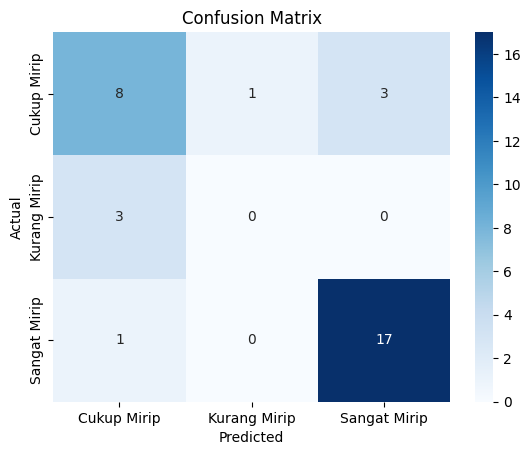

Classification Report:
              precision    recall  f1-score   support

 Cukup Mirip       0.67      0.67      0.67        12
Kurang Mirip       0.00      0.00      0.00         3
Sangat Mirip       0.85      0.94      0.89        18

    accuracy                           0.76        33
   macro avg       0.51      0.54      0.52        33
weighted avg       0.71      0.76      0.73        33



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

# Ambil kolom yang dibutuhkan untuk split
df_split = cosine_df[['pertanyaan', 'respon_jawaban', 'kategori']]

# Split data menjadi data latih dan data test
# Gunakan stratify=df_split['kategori'] untuk memastikan proporsi kategori sama di train/test
X_train, X_test, y_train, y_test = train_test_split(
    df_split[['pertanyaan', 'respon_jawaban']], # Using both question and response for features
    df_split['kategori'],
    test_size=0.2,  # 20% data untuk test
    random_state=42, # untuk hasil yang konsisten
    stratify=df_split['kategori'] # menjaga proporsi kategori
)

# Gabungkan pertanyaan + jawaban untuk proses TF-IDF
X_train_text = X_train['pertanyaan'] + " " + X_train['respon_jawaban']
X_test_text = X_test['pertanyaan'] + " " + X_test['respon_jawaban']

# Buat pipeline model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Latih model
pipeline.fit(X_train_text, y_train)

# Prediksi data test
y_pred = pipeline.predict(X_test_text)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Laporan klasifikasi
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=pipeline.classes_))


######  Exact Match (Kecocokan Jawaban dengan Kunci)

In [ ]:
# Fungsi membandingkan dua list kata
def exact_match(jawaban_responden, jawaban_kunci):
    return int(jawaban_responden == jawaban_kunci)

# Simpan hasil perbandingan
hasil_match = []

# Cek semua baris (tiap pertanyaan)
for idx, row in data_clean.iterrows():
    key = row.get('kunci_jawaban_stem')

    if not isinstance(key, list):
        continue  # skip kalau tidak valid

    # Cek semua kolom yang nama akhirnya '_stem' kecuali kunci
    kolom_jawaban = [col for col in data_clean.columns if col.endswith('_stem') and col != 'kunci_jawaban_stem']

    for kolom in kolom_jawaban:
        jawaban = row.get(kolom)
        if not isinstance(jawaban, list):
            continue  # skip kalau tidak valid

        hasil_match.append({
            'pertanyaan': row['pertanyaan'],
            'responden': kolom.replace('_stem', ''),
            'jawaban': ' '.join(jawaban),
            'kunci': ' '.join(key),
            'match': exact_match(jawaban, key)
        })

# Buat DataFrame hasil
match_df = pd.DataFrame(hasil_match)

# Tampilkan hasil
print("\nContoh hasil exact match:")
print(match_df.head())

# Hitung akurasi
akurasi = match_df['match'].mean()
print(f"\nAkurasi keseluruhan exact match: {akurasi:.2f}")

# Jumlah exact match per pertanyaan
print("\nExact match per pertanyaan:")
print(match_df.groupby('pertanyaan')['match'].sum())

# Jumlah exact match per responden
print("\nExact match per responden:")
print(match_df.groupby('responden')['match'].sum())



Contoh hasil exact match:
                           pertanyaan responden  \
0  apa dimaksud demam berdarah dengue        r1   
1  apa dimaksud demam berdarah dengue        r2   
2  apa dimaksud demam berdarah dengue        r3   
3  apa dimaksud demam berdarah dengue        r4   
4  apa dimaksud demam berdarah dengue        r5   

                                                                                                                                                                                                             jawaban  \
0                                                                  demam darah dengue sakit infeksi virus akut sebab virus demam darah dengue tular lalu gigit nyamuk aedes aegypti aegypti aedes aegypti albopictus   
1  demam darah dengue sakit sebab virus demam darah dengue tular lalu gigit nyamuk aedes aegypti aegypti sakit tanda demam tinggi nyeri otot sendi ruam kulit bisa sebab darah serius hingga mati tidak tangan cepat   
2                 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Ambil hasil classification report dalam bentuk dictionary
report = classification_report(y_test, y_pred, target_names=classes, output_dict=True)

# Siapkan data
kategori = classes
precision = [report[k]['precision'] for k in kategori]
recall = [report[k]['recall'] for k in kategori]
f1 = [report[k]['f1-score'] for k in kategori]

x = np.arange(len(kategori))
lebar = 0.25

# Buat plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - lebar, precision, width=lebar, label='Precision', color='skyblue')
bars2 = plt.bar(x, recall, width=lebar, label='Recall', color='lightgreen')
bars3 = plt.bar(x + lebar, f1, width=lebar, label='F1-score', color='salmon')

# Tambahkan label angka di atas batang
def tambah_label(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

tambah_label(bars1)
tambah_label(bars2)
tambah_label(bars3)

# Tambahan estetika
plt.xticks(x, kategori)
plt.ylabel('Skor')
plt.title('Precision, Recall, dan F1-score per Kategori')
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'classes' is not defined

In [ ]:
import pandas as pd

# Fungsi sederhana untuk cek apakah dua list kata cocok persis (setelah di-join)
def is_exact_match(list1, list2):
    return int(' '.join(list1) == ' '.join(list2))

# Simpan hasil perbandingan
hasil = []

for i, row in data_clean.iterrows():
    kunci = row['kunci_jawaban_stem']
    pertanyaan = row['pertanyaan']

    # Cek semua responden dari r1 sampai r34
    for r in range(1, 35):
        kolom = f"r{r}_stem"

        if kolom in data_clean.columns:
            jawaban = row[kolom]

            # Jika kosong atau bukan list, lewati
            if not isinstance(jawaban, list):
                continue

            cocok = is_exact_match(jawaban, kunci)

            hasil.append({
                "pertanyaan": pertanyaan,
                "responden": f"r{r}",
                "jawaban_stem": ' '.join(jawaban),
                "kunci_stem": ' '.join(kunci),
                "cocok": cocok
            })

# Buat DataFrame hasil perbandingan
df_exact_match = pd.DataFrame(hasil)

# Tampilkan sebagai DataFrame
print(df_exact_match)

# Hitung dan tampilkan proporsi kecocokan
total = len(df_exact_match)
jumlah_cocok = df_exact_match['cocok'].sum()
proporsi = jumlah_cocok / total if total > 0 else 0

print(f"\nTotal dibandingkan: {total}")
print(f"Jumlah cocok persis: {jumlah_cocok}")
print(f"Proporsi exact match: {proporsi:.2f}")


In [ ]:
# import pandas as pd
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression  # Example classifier
# from sklearn.pipeline import Pipeline



# # Ambil kolom yang dibutuhkan untuk split
# df_split = cosine_df[['pertanyaan', 'respon_jawaban', 'kategori']]

# # Split data menjadi data latih dan data test
# # Gunakan stratify=df_split['kategori'] untuk memastikan proporsi kategori sama di train/test
# X_train, X_test, y_train, y_test = train_test_split(
#     df_split[['pertanyaan', 'respon_jawaban']], # Using both question and response for features
#     df_split['kategori'],
#     test_size=0.2,  # 20% data untuk test
#     random_state=42, # untuk hasil yang konsisten
#     stratify=df_split['kategori'] # menjaga proporsi kategori
# )

# # --- New code to train a model and make predictions ---

# # Create a simple classification pipeline
# # We will combine 'pertanyaan' and 'respon_jawaban' for vectorization
# X_train_combined = X_train['pertanyaan'] + " " + X_train['respon_jawaban']
# X_test_combined = X_test['pertanyaan'] + " " + X_test['respon_jawaban']

# # It's better to use a Pipeline for text data
# model_pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),         # Step 1: Vectorize text using TF-IDF
#     ('classifier', LogisticRegression())  # Step 2: Train a classifier (Logistic Regression as an example)
# ])

# # Train the model
# print("Training the model...")
# model_pipeline.fit(X_train_combined, y_train)
# print("Training complete.")

# # Make predictions on the test data
# print("Making predictions on test data...")
# y_pred = model_pipeline.predict(X_test_combined)
# print("Predictions made.")

# # --- Code for Confusion Matrix and Visualization ---

# # Membuat confusion matrix
# # Ensure the labels in y_test and y_pred are consistent.
# # The order of labels in confusion_matrix matters for consistent interpretation.
# # We can get the unique classes from the training data or the model itself.
# classes = model_pipeline.classes_
# cm = confusion_matrix(y_test, y_pred, labels=classes)

# # Menampilkan confusion matrix
# print("\nConfusion Matrix:")
# print(cm)

# # Visualisasi Confusion Matrix
# plt.figure(figsize=(8, 6))
# # Use the classes from the model for xticklabels and yticklabels
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()

# # Optional: Print classification report for more metrics
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, target_names=classes))

# # --- Code for Exact Match ---

# # Asumsi:
# # - Anda memiliki DataFrame 'data_clean' yang berisi hasil preprocessing
# # - Kolom '_stem' ada untuk kunci jawaban dan semua jawaban responden

# # Jika 'kunci_jawaban_stem' tidak ada, Anda perlu melakukan tokenisasi dan stemming untuk kunci jawaban
# # from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Make sure stemmer is imported
# # factory = StemmerFactory()
# # stemmer = factory.create_stemmer()

# # Assuming 'word_tokenize' and 'stemmer' are available from previous cells
# if 'kunci_jawaban_stem' not in data_clean.columns:
#     print("Stemming 'kunci_jawaban'...")
#     # data_clean['kunci_jawaban_stem'] = data_clean['kunci_jawaban'].astype(str).apply(word_tokenize).apply(lambda tokens: [stemmer.stem(token) for token in tokens])
#     # Note: This part depends on where 'kunci_jawaban' comes from in data_clean.
#     # Assuming data_clean is derived from 'data' and 'data_k' merge,
#     # 'kunci_jawaban' should be available.
#     # Re-apply stemming to 'kunci_jawaban' if it wasn't done in the preprocessing phase for data_clean
#     # Find the original 'kunci_jawaban' column in data_clean
#     original_kunci_col = None
#     for col in data_clean.columns:
#         # Heuristic: find a column that looks like the original kunci_jawaban text
#         # This might need adjustment based on the exact state of your data_clean
#         if 'kunci_jawaban' in col and not col.endswith('_stem') and not col.endswith('_token'):
#              original_kunci_col = col
#              break

#     if original_kunci_col:
#         data_clean['kunci_jawaban_token'] = data_clean[original_kunci_col].astype(str).apply(word_tokenize)
#         data_clean['kunci_jawaban_stem'] = data_clean['kunci_jawaban_token'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
#         print("'kunci_jawaban_stem' created.")
#     else:
#         print("Warning: Could not find original 'kunci_jawaban' column in data_clean to create 'kunci_jawaban_stem'. Exact match might not work as expected.")


# # Fungsi untuk membandingkan dua list token (exact match)
# def exact_match_compare(list1, list2):
#     # Handle potential None or non-list types
#     if not isinstance(list1, list) or not isinstance(list2, list):
#         return 0 # Not an exact match if types are wrong

#     # Gabungkan list token menjadi string untuk perbandingan
#     str1 = ' '.join(list1)
#     str2 = ' '.join(list2)
#     return int(str1 == str2) # Return 1 if exact match, 0 otherwise

# # Siapkan list untuk menyimpan hasil exact match
# exact_match_results = []

# # Loop setiap baris data (setiap pertanyaan) di data_clean
# for index, row in data_clean.iterrows():
#     question = row['pertanyaan']
#     # Ensure 'kunci_jawaban_stem' exists and is a list
#     if 'kunci_jawaban_stem' in row and isinstance(row['kunci_jawaban_stem'], list):
#         key_stem = row['kunci_jawaban_stem']
#     else:
#         # Skip this row if key_stem is not available or not in expected format
#         print(f"Skipping row {index} due to missing or invalid 'kunci_jawaban_stem'")
#         continue

#     # cek jawaban dari r1 sampai r34 (Sesuaikan rentang responden)
#     # Iterate through columns that end with '_stem' except 'kunci_jawaban_stem'
#     stem_cols = [col for col in data_clean.columns if col.endswith('_stem') and col != 'kunci_jawaban_stem']

#     for nama_kolom_stem in stem_cols:
#         # Extract respondent number from column name (e.g., 'r1_stem' -> 'r1')
#         responden = nama_kolom_stem.replace('_stem', '')

#         # Ensure the respondent's stem column exists and is a list
#         if nama_kolom_stem in row and isinstance(row[nama_kolom_stem], list):
#              jawaban_stem = row[nama_kolom_stem]

#              # Lakukan exact match comparison
#              is_exact_match = exact_match_compare(jawaban_stem, key_stem)

#              # Simpan hasilnya
#              exact_match_results.append({
#                  "pertanyaan": question,
#                  "responden": responden,
#                  "respon_jawaban_stem": ' '.join(jawaban_stem), # Store as string for readability
#                  "kunci_jawaban_stem": ' '.join(key_stem),     # Store as string
#                  "exact_match": is_exact_match
#              })
#         # else:
#             # Optional: Print warning if a respondent's stem column is missing or invalid
#             # print(f"Skipping respondent '{responden}' for question '{question[:30]}...' due to missing or invalid stem data.")


# exact_match_df = pd.DataFrame(exact_match_results)

# print("\nExact Match Results:")
# print(exact_match_df.head())

# # You can then analyze the exact_match_df
# # e.g., calculate accuracy or count exact matches per question/respondent
# exact_match_accuracy = exact_match_df['exact_match'].mean()
# print(f"\nOverall Exact Match Accuracy: {exact_match_accuracy:.3f}")

# # Count exact matches per question
# exact_match_per_question = exact_match_df.groupby('pertanyaan')['exact_match'].sum().reset_index()
# print("\nExact Matches per Question:")
# print(exact_match_per_question)

# # Count exact matches per respondent
# exact_match_per_responden = exact_match_df.groupby('responden')['exact_match'].sum().reset_index()
# print("\nExact Matches per Responden:")
# print(exact_match_per_responden)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# # Hitung precision, recall, dan f1-score dari classification_report
# report_dict = classification_report(y_test, y_pred, target_names=classes, output_dict=True)

# # Extract metrics for each class
# categories = classes # Your class names ('Kurang Mirip', 'Cukup Mirip', 'Sangat Mirip')
# precision_scores = [report_dict[cat]['precision'] for cat in categories]
# recall_scores = [report_dict[cat]['recall'] for cat in categories]
# f1_scores = [report_dict[cat]['f1-score'] for cat in categories]

# # Plotting
# x = np.arange(len(categories))  # the label locations
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots(figsize=(10, 7))

# # Create bars for each metric
# rects1 = ax.bar(x - width, precision_scores, width, label='Precision', color='skyblue')
# rects2 = ax.bar(x, recall_scores, width, label='Recall', color='lightgreen')
# rects3 = ax.bar(x + width, f1_scores, width, label='F1-score', color='salmon')

# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Score')
# ax.set_title('Performance Metrics by Category (Precision, Recall, F1-score)')
# ax.set_xticks(x)
# ax.set_xticklabels(categories)
# ax.legend()

# # Add the metric values on top of the bars
# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(f'{height:.2f}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

# fig.tight_layout()
# plt.show()

In [ ]:
# import pandas as pd
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# # Asumsikan data_clean memiliki kolom '_stem' untuk kunci jawaban dan semua jawaban responden
# # Jika 'kunci_jawaban_stem' tidak ada, Anda perlu melakukan tokenisasi dan stemming untuk kunci jawaban
# if 'kunci_jawaban_stem' not in data_clean.columns:
#     # Lakukan tokenisasi dan stemming untuk kunci jawaban
#     data_clean['kunci_jawaban_stem'] = data_clean['kunci_jawaban'].astype(str).apply(word_tokenize).apply(lambda tokens: [stemmer.stem(token) for token in tokens])


# # Fungsi untuk membandingkan dua list token (exact match)
# def exact_match_compare(list1, list2):
#     # Gabungkan list token menjadi string untuk perbandingan
#     str1 = ' '.join(list1)
#     str2 = ' '.join(list2)
#     return int(str1 == str2) # Return 1 if exact match, 0 otherwise

# # Siapkan list untuk menyimpan hasil exact match
# exact_match_results = []

# # Loop setiap baris data (setiap pertanyaan)
# for index, row in data_clean.iterrows():
#     question = row['pertanyaan']
#     key_stem = row['kunci_jawaban_stem']

#     # cek jawaban dari r1 sampai r32
#     for nomor_responden in range(1, 35): # Sesuaikan rentang responden
#         nama_kolom_stem = f"r{nomor_responden}_stem"

#         # Cek kolom stem responden ada
#         if nama_kolom_stem in data_clean.columns:
#             jawaban_stem = row[nama_kolom_stem]

#             # Lakukan exact match comparison
#             is_exact_match = exact_match_compare(jawaban_stem, key_stem)

#             # Simpan hasilnya
#             exact_match_results.append({
#                 "pertanyaan": question,
#                 "responden": f"r{nomor_responden}",
#                 "respon_jawaban_stem": ' '.join(jawaban_stem), # Simpan sebagai string untuk kemudahan
#                 "kunci_jawaban_stem": ' '.join(key_stem),     # Simpan sebagai string
#                 "exact_match": is_exact_match
#             })

# # Buat DataFrame dari hasil exact match
# exact_match_df = pd.DataFrame(exact_match_results)

# # Tampilkan DataFrame
# print("\nExact Match Results:")
# print(exact_match_df)

# # Jumlah total perbandingan
# total_comparisons = len(exact_match_df)
# # Jumlah exact match
# total_exact_matches = exact_match_df['exact_match'].sum()

# # Hitung "Accuracy" (sebagai proporsi exact match)
# exact_match_proportion = total_exact_matches / total_comparisons if total_comparisons > 0 else 0

# print(f"\nTotal Comparisons: {total_comparisons}")
# print(f"Total Exact Matches: {total_exact_matches}")
# print(f"Proporsi Exact Match (Pseudo-Accuracy): {exact_match_proportion:.4f}")